<img src="https://content.presspage.com/clients/o_685.jpg">

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared
from sklearn.linear_model import LogisticRegression
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

# Load the data

In [25]:
booking_df = pd.read_csv("booking_properties_cleaned_2.csv")

In [26]:
booking_df.head()

element  \
0  b600fc1e-174a-444a-bf45-4dbd0a62ef78   
1  bfb95abd-6fb8-40a8-a4fa-538ef48764de   
2  cc9a1804-0c4c-4dd0-9432-a8ccabe31494   
3  77092025-974b-409e-9d95-16941c2104a2   
4  c9e81d40-0999-45df-bdb5-1ea93b3b55c4   

                                                 url    check_in   check_out  \
0  https://www.booking.com/hotel/us/holiday-inn-l...  2023-03-05  2023-03-06   
1  https://www.booking.com/hotel/us/margaritavill...  2023-03-05  2023-03-06   
2  https://www.booking.com/hotel/us/the-draper-as...  2023-03-05  2023-03-06   
3  https://www.booking.com/hotel/us/nhcollection-...  2023-03-05  2023-03-06   
4  https://www.booking.com/hotel/us/omni-bershire...  2023-03-05  2023-03-06   

   length_of_stay  time_to_travel  \
0               1               1   
1               1               1   
2               1               1   
3               1               1   
4               1               1   

                                                name  review_score  \
0          Holiday Inn Lower East Side, an IHG Hotel           7.9   
1                 Margaritaville Resort Times Square           8.8   
2  The Draper New York, Tapestry Collection by Hi...           8.4   
3              NH Collection New York Madison Avenue           8.2   
4                               Omni Berkshire Place           8.7   

   review_count  review_summery  ...  rating_stars free_cancelation  \
0         695.0             1.0  ...           4.0                0   
1        1367.0             3.0  ...           4.0                0   
2        1009.0             2.0  ...           3.0                0   
3        1168.0             2.0  ...           4.0                0   
4         519.0             3.0  ...           4.0                0   

   is_breakfast_included  room_name_type bed_room_type  preferred_badge  \
0                      0               0             7                0   
1                      0               0             6                1   
2                      0               0             4                1   
3                      0               0             5                1   
4                      0               0             7                1   

   is_promoted  place_in_page  distance_from_center_by_km  price_per_night  
0            1              1                         5.6           111.07  
1            0              2                         1.5           168.20  
2            0              3                         1.9           169.07  
3            1              4                         2.0           228.81  
4            0              5                         1.1           279.56  

[5 rows x 25 columns]

In [27]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68681 entries, 0 to 68680
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   element                     68681 non-null  object 
 1   url                         68681 non-null  object 
 2   check_in                    68681 non-null  object 
 3   check_out                   68681 non-null  object 
 4   length_of_stay              68681 non-null  int64  
 5   time_to_travel              68681 non-null  int64  
 6   name                        68681 non-null  object 
 7   review_score                68681 non-null  float64
 8   review_count                68681 non-null  float64
 9   review_summery              68681 non-null  float64
 10  price                       68681 non-null  float64
 11  address                     68681 non-null  object 
 12  location_score              68681 non-null  float64
 13  is_sustainable              686

In [28]:
booking_df['check_in'] = pd.to_datetime(booking_df['check_in'])
booking_df['check_out'] = pd.to_datetime(booking_df['check_out'])

In [29]:
booking_df.describe().T

count         mean          std    min     25%  \
length_of_stay              68681.0     3.004688     1.413969   1.00    2.00   
time_to_travel              68681.0    15.450226     8.646241   1.00    8.00   
review_score                68681.0     7.968563     0.592692   0.00    7.60   
review_count                68681.0  2160.472838  2426.522135   0.00  700.00   
review_summery              68681.0     1.661580     0.795454   0.00    1.00   
price                       68681.0   895.506805   498.734940  80.04  474.15   
location_score              68681.0     4.103631     4.681359   0.00    0.00   
is_sustainable              68681.0     0.611101     0.487504   0.00    0.00   
rating_stars                68681.0     3.823314     0.662839   0.00    4.00   
free_cancelation            68681.0     0.587120     0.492355   0.00    0.00   
is_breakfast_included       68681.0     0.220454     0.414556   0.00    0.00   
room_name_type              68681.0     0.278243     1.261769   0.00    0.00   
bed_room_type               68681.0     6.197464     1.326481   0.00    6.00   
preferred_badge             68681.0     0.921143     0.269518   0.00    1.00   
is_promoted                 68681.0     0.204438     0.403293   0.00    0.00   
place_in_page               68681.0    80.915406    48.648500   1.00   40.00   
distance_from_center_by_km  68681.0     2.665977     2.043892   0.00    1.40   
price_per_night             68681.0   296.825780    82.431094  71.92  238.32   

                               50%      75%       max  
length_of_stay                 3.0     4.00      5.00  
time_to_travel                15.0    23.00     30.00  
review_score                   8.0     8.30     10.00  
review_count                1330.0  2578.00  15273.00  
review_summery                 2.0     2.00      5.00  
price                        841.0  1244.39   2476.31  
location_score                 0.0     9.40      9.90  
is_sustainable                 1.0     1.00      1.00  
rating_stars                   4.0     4.00      5.00  
free_cancelation               1.0     1.00      1.00  
is_breakfast_included          0.0     0.00      1.00  
room_name_type                 0.0     0.00      6.00  
bed_room_type                  7.0     7.00      8.00  
preferred_badge                1.0     1.00      1.00  
is_promoted                    0.0     0.00      1.00  
place_in_page                 79.0   120.00    210.00  
distance_from_center_by_km     1.9     3.00      9.80  
price_per_night              291.3   349.91    526.93

/var/folders/cr/sz5qnpp96w183bm2h622d9yc0000gn/T/ipykernel_96241/3001031589.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = booking_df.corr()


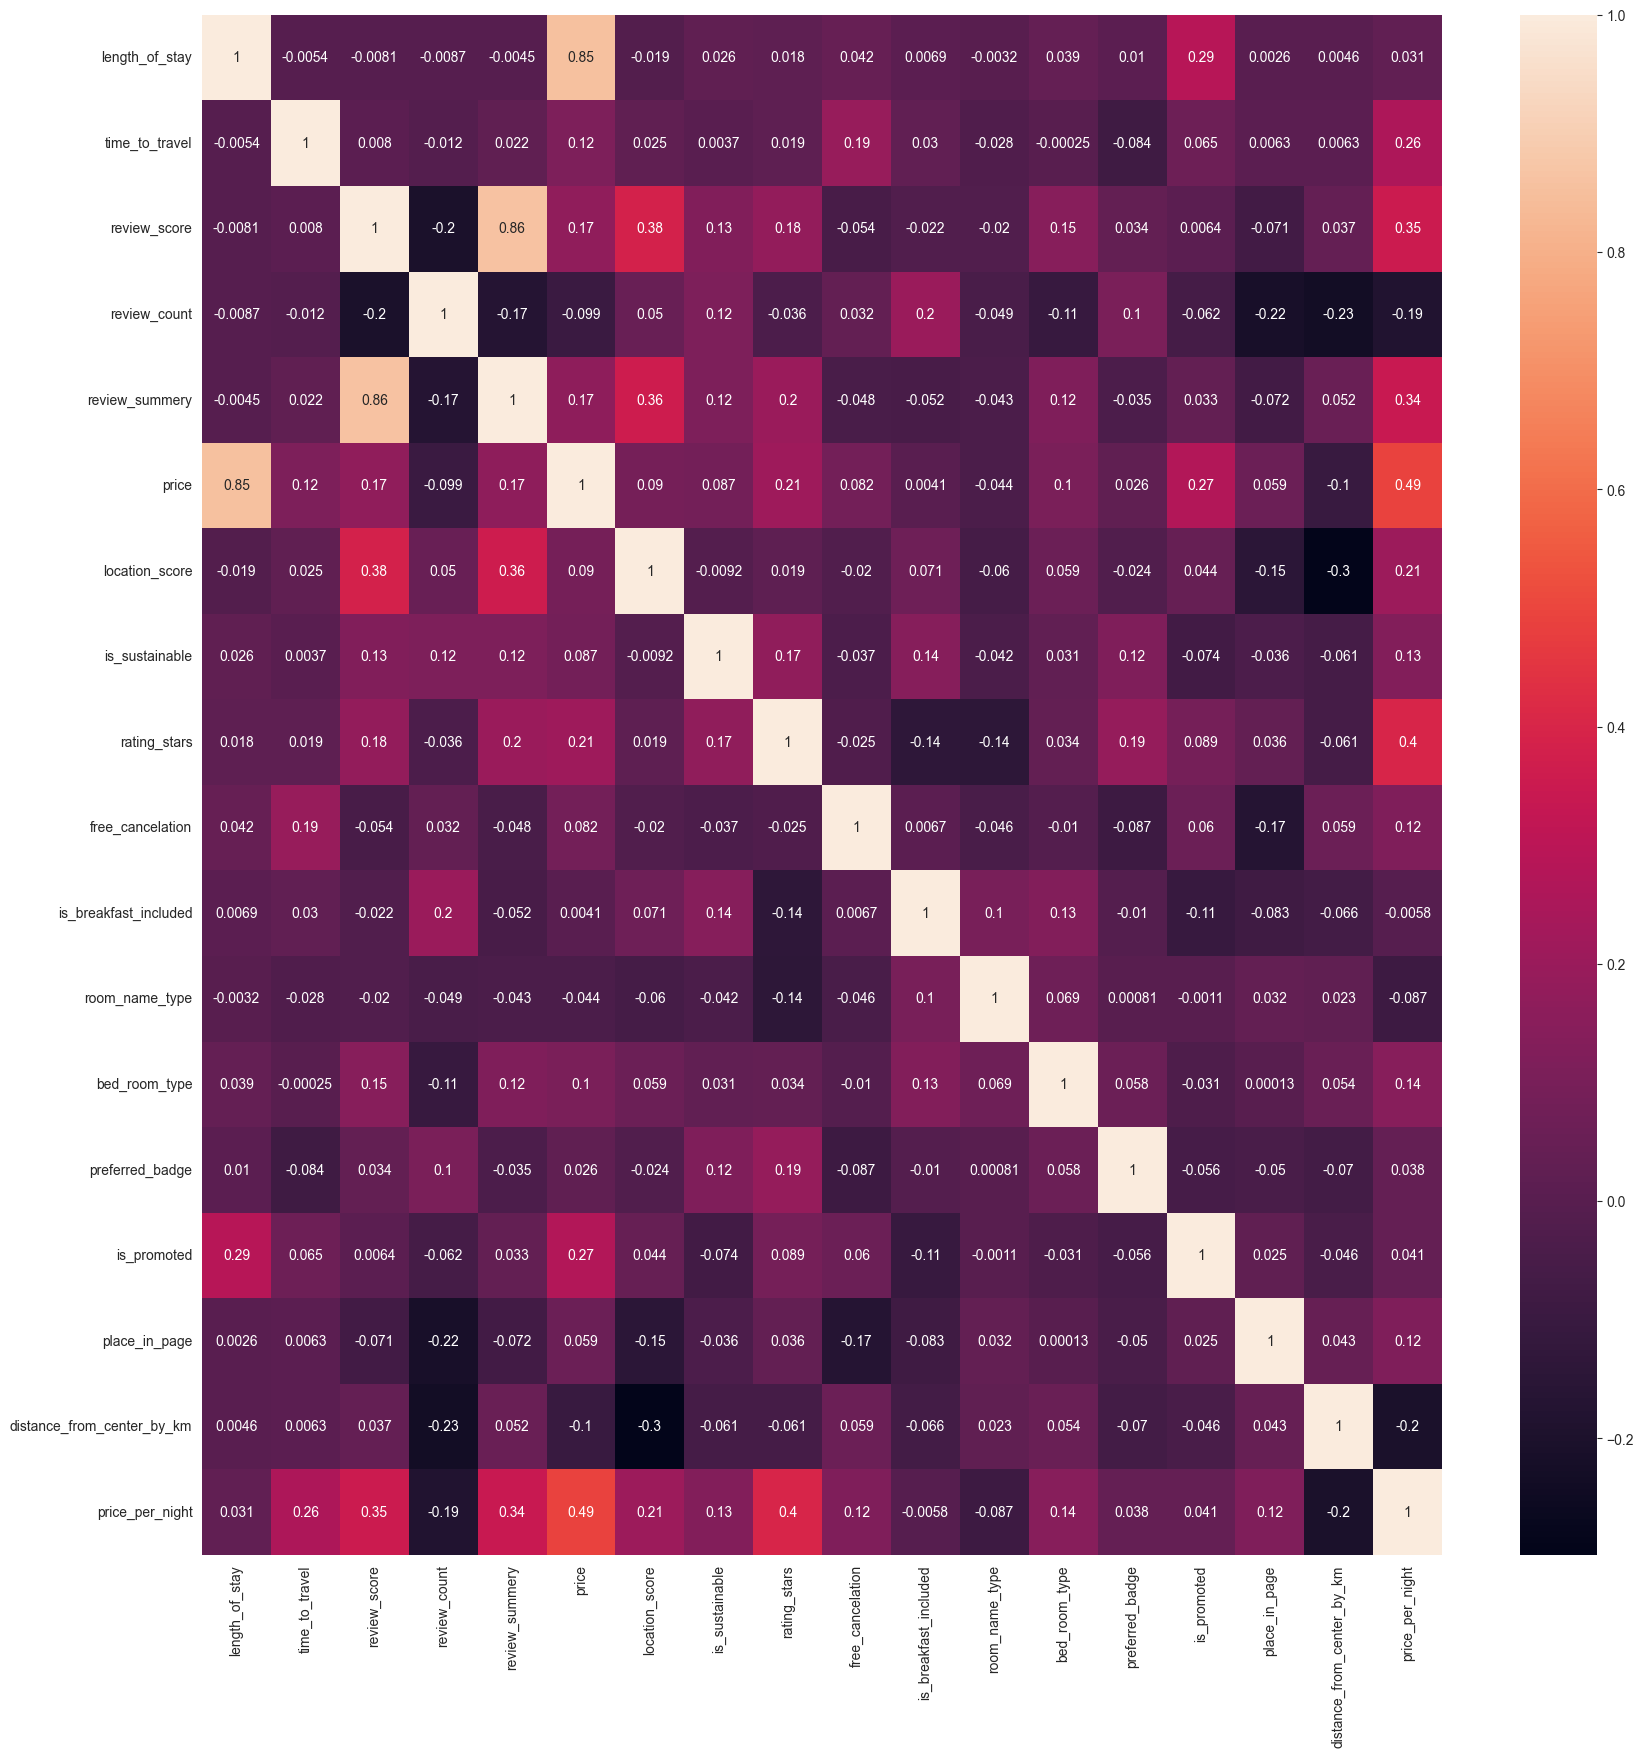

In [30]:
corr = booking_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

# linear regression

In [31]:
lreg_booking = LinearRegression()
y = booking_df["price"]
X = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)

In [32]:
X

length_of_stay  time_to_travel  review_score  review_count  \
0                   1               1           7.9         695.0   
1                   1               1           8.8        1367.0   
2                   1               1           8.4        1009.0   
3                   1               1           8.2        1168.0   
4                   1               1           8.7         519.0   
...               ...             ...           ...           ...   
68676               5              30           7.4         466.0   
68677               5              30           8.4        1689.0   
68678               5              30           8.1        2433.0   
68679               5              30           8.7         718.0   
68680               5              30           7.9         400.0   

       review_summery  location_score  is_sustainable  rating_stars  \
0                 1.0             0.0               1           4.0   
1                 3.0             9.4               1           4.0   
2                 2.0             9.4               1           3.0   
3                 2.0             0.0               1           4.0   
4                 3.0             9.6               0           4.0   
...               ...             ...             ...           ...   
68676             1.0             0.0               1           3.0   
68677             2.0             9.7               1           5.0   
68678             2.0             0.0               0           4.0   
68679             3.0             9.5               1           4.0   
68680             1.0             0.0               0           4.0   

       free_cancelation  is_breakfast_included  room_name_type  bed_room_type  \
0                     0                      0               0              7   
1                     0                      0               0              6   
2                     0                      0               0              4   
3                     0                      0               0              5   
4                     0                      0               0              7   
...                 ...                    ...             ...            ...   
68676                 1                      1               0              7   
68677                 0                      0               0              7   
68678                 0                      0               0              6   
68679                 0                      0               0              4   
68680                 0                      0               0              8   

       preferred_badge  is_promoted  place_in_page  distance_from_center_by_km  
0                    0            1              1                         5.6  
1                    1            0              2                         1.5  
2                    1            0              3                         1.9  
3                    1            1              4                         2.0  
4                    1            0              5                         1.1  
...                ...          ...            ...                         ...  
68676                0            0            145                         1.9  
68677                0            1            147                         0.6  
68678                1            1            148                         2.4  
68679                0            1            149                         1.8  
68680                0            1            150                         2.0  

[68681 rows x 16 columns]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from tqdm import tqdm
for i in tqdm(range(100)):
    lreg_booking.fit(X_train, y_train)

100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


In [35]:
a,b = (lreg_booking.coef_, lreg_booking.intercept_)
print("coef: ", a)
print("intercept: ", b)

coef:  [ 2.99377872e+02  6.06239434e+00  7.30591333e+01 -1.64501881e-02
  3.06001661e+01  2.68090518e+00  2.46161408e+01  1.14505221e+02
  6.08285324e+01  2.89666791e+01 -6.01282541e+00  1.59871476e+01
 -3.77687749e+00 -7.10703581e+00  6.61914107e-01 -2.97479656e+01]
intercept:  -1267.674229813323


linear regression prediction for train: [ 563.40208181  647.41034891 1206.89510412 ... 1546.90057518 1633.61627651
 1350.31184587]
linear regression prediction for test: [ 496.61529454  113.16952031 1205.82837726 ...  659.38820212  444.60984856
  954.07898816]


<Figure size 1000x1000 with 0 Axes>

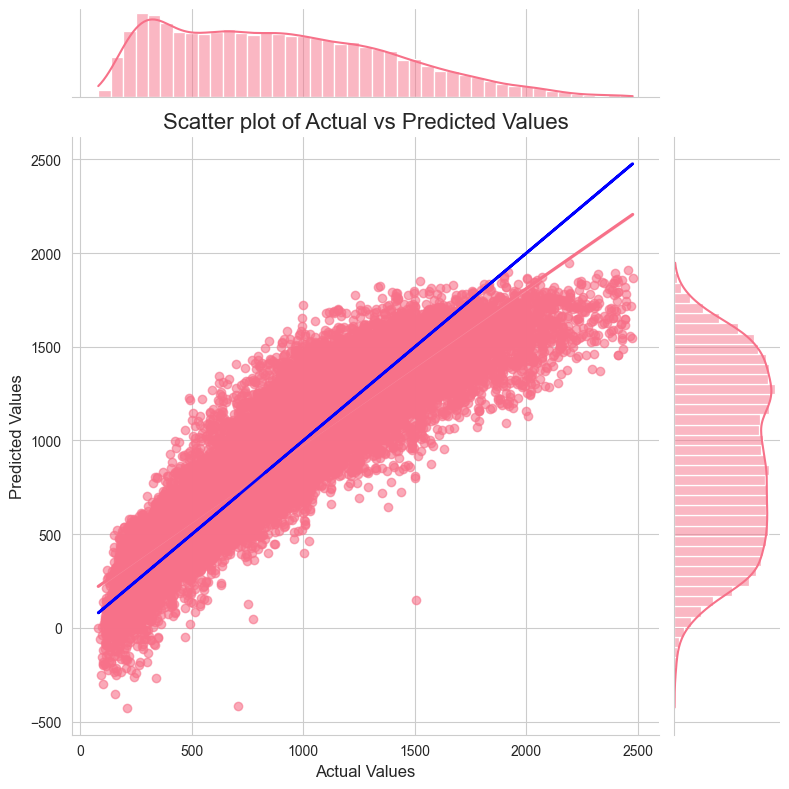

In [40]:
y_train_pred = lreg_booking.predict(X_train)
y_test_pred = lreg_booking.predict(X_test)
print(f'linear regression prediction for train: {y_train_pred}')
print(f'linear regression prediction for test: {y_test_pred}')
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_test_pred, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
resid = y_test - y_test_pred

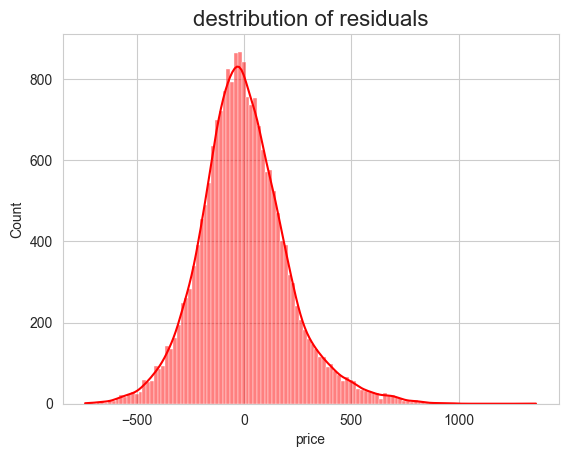

In [38]:
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

In [39]:
mse = mean_squared_error(y_test,y_test_pred)
rmse = mse**0.5
r2_lreg = r2_score(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg)

mse:  42523.557235771106
rmse:  206.21240805482853
mae:  156.42590368140546
r2_score:  0.8278367409224687


## linear regression -> with on target price per night

In [41]:
lreg_booking = LinearRegression()
y = booking_df["price_per_night"]
X = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lreg_booking.fit(X_train, y_train)

LinearRegression()

In [42]:
a,b = (lreg_booking.coef_, lreg_booking.intercept_)
print("coef: ", a)
print("intercept: ", b)

coef:  [ 1.69316365e+00  2.09110715e+00  2.24355421e+01 -5.54327600e-03
  1.12765090e+01  8.69545280e-01  7.82705644e+00  3.90713798e+01
  2.48366120e+01  9.01288287e+00 -2.10651558e+00  5.31317082e+00
  8.83151472e-01 -7.91005279e+00  2.34851022e-01 -9.57990027e+00]
intercept:  -125.52781669519999


<Figure size 500x500 with 0 Axes>

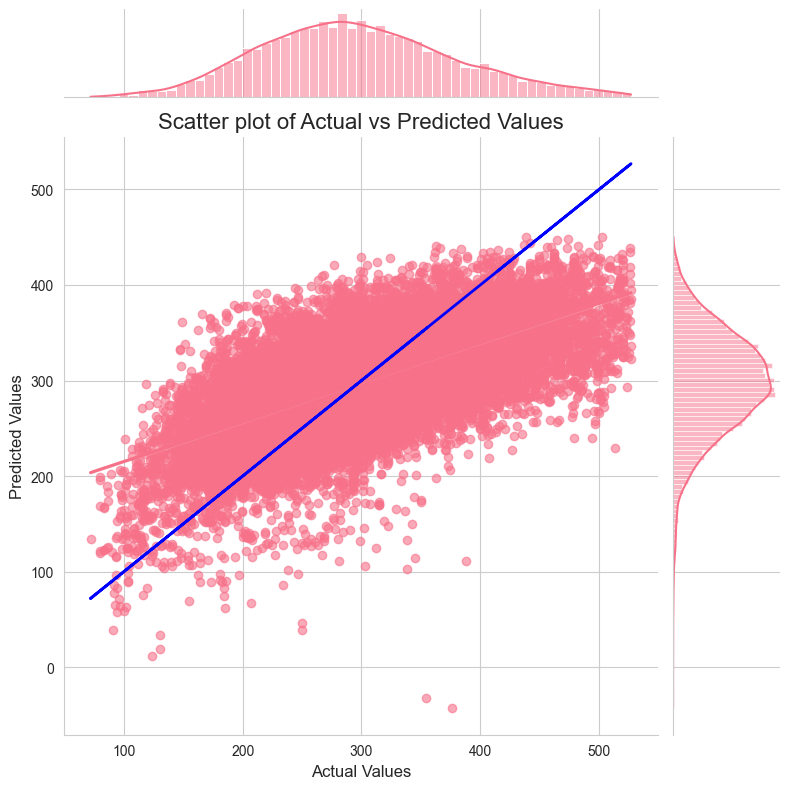

In [43]:
y_train_pred = lreg_booking.predict(X_train)
y_test_pred = lreg_booking.predict(X_test)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_test_pred, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

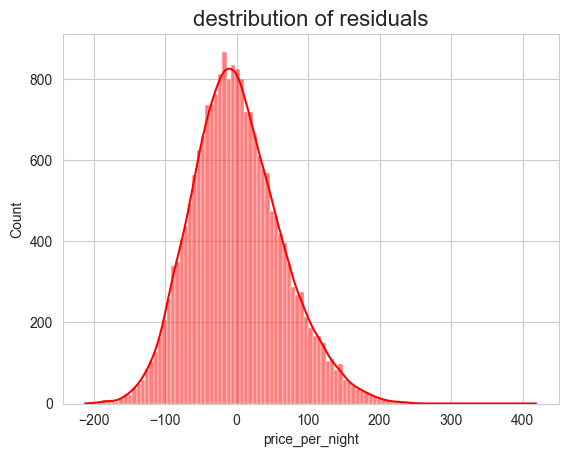

In [44]:
resid = y_test - y_test_pred
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

In [45]:
mse = mean_squared_error(y_test,y_test_pred)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
print("the scores of the linear regression on price per night: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_lreg_per_night)

the scores of the linear regression on price per night: 
mse:  3972.5812413629787
rmse:  63.02841614195123
mae:  49.78263417693723
r2_score:  0.40533114225848077


# desicion tree regression

In [49]:
lreg_tree_booking = DecisionTreeRegressor()
y = booking_df["price"]
X = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"]
                    ,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {'max_depth': range(1,11)}
gird = GridSearchCV(lreg_tree_booking,param_grid)
for i in tqdm(range(100)):
    gird.fit(X_train, y_train)

100%|██████████| 100/100 [07:21<00:00,  4.42s/it]


In [53]:
gird.best_params_

{'max_depth': 10}

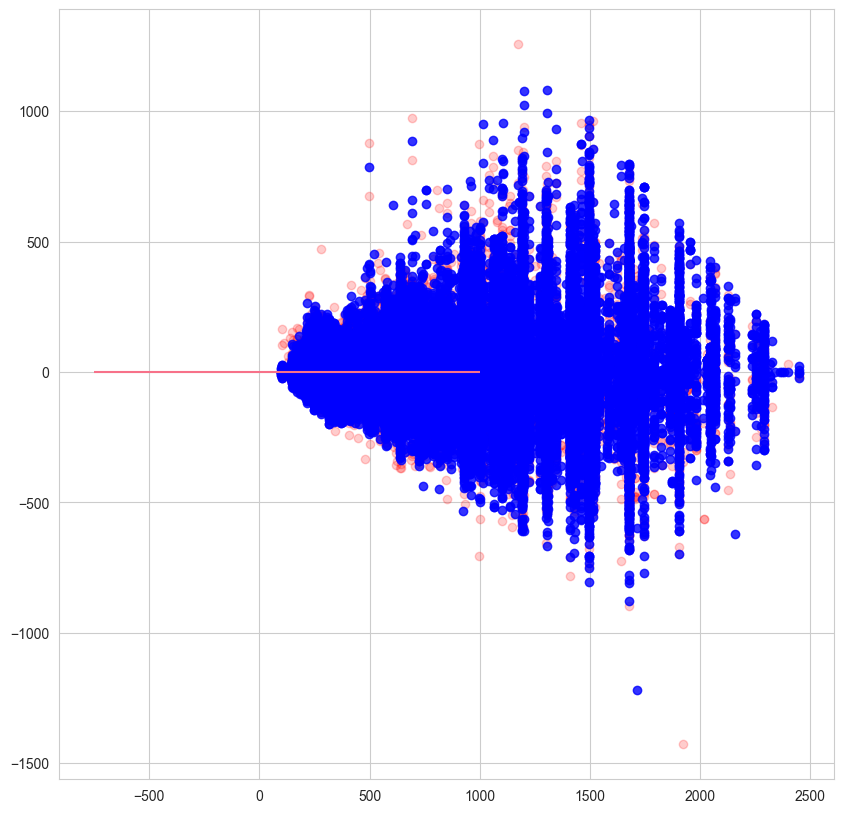

In [51]:
pred_test = gird.predict(X_test)
pred_train = gird.predict(X_train)
plt.figure(figsize=(10,10))
test = plt.scatter(pred_test, y_test-pred_test, color="red", label="test",alpha=0.2)
train = plt.scatter(pred_train, y_train-pred_train, color="blue", label="train",alpha=0.8)
plt.hlines(y=0,xmin=-750,xmax =1000)

In [54]:
resid = y_test - pred_test

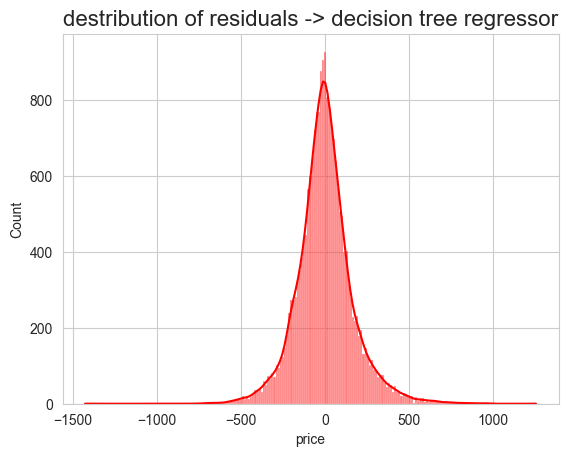

In [55]:
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> decision tree regressor", fontsize=16)
plt.show()

In [56]:
mse = mean_squared_error(y_test, pred_test)
rmse = mse ** 0.5
r2_dtr = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_dtr)

mse:  28268.75245920901
rmse:  168.1331390868826
mae:  121.06324258340629
r2_score:  0.8855495431285466


 ### let's see what happens when we try to predict the price per night without the length of stay

In [59]:
lreg_tree_booking = DecisionTreeRegressor()
y = booking_df["price_per_night"]
X = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in","length_of_stay"]
                    ,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {'max_depth': range(1,11)}
grid = GridSearchCV(lreg_tree_booking,param_grid)
for i in tqdm(range(100)):
    grid.fit(X_train, y_train)

100%|██████████| 100/100 [06:45<00:00,  4.06s/it]


In [62]:
grid.best_params_

{'max_depth': 10}

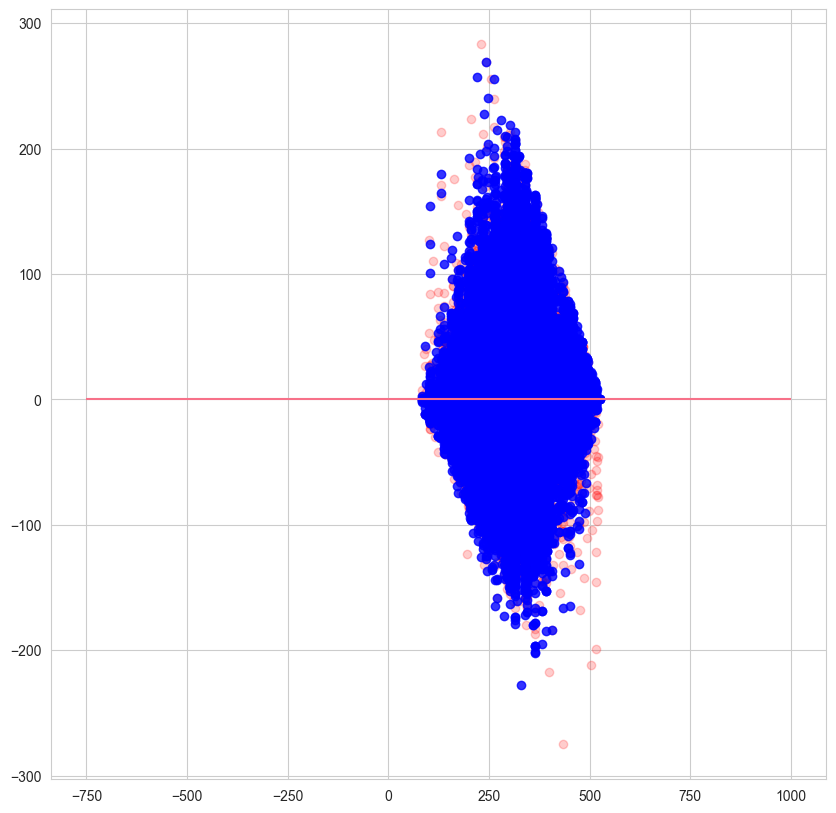

mse:  2525.2695077927756
rmse:  50.2520597368185
mae:  38.46517793816625
r2_score:  0.621984034447741


In [61]:
pred_test = grid.predict(X_test)
pred_train = grid.predict(X_train)
plt.figure(figsize=(10,10))
test = plt.scatter(pred_test, y_test-pred_test, color="red", label="test",alpha=0.2)
train = plt.scatter(pred_train, y_train-pred_train, color="blue", label="train",alpha=0.8)
plt.hlines(y=0,xmin=-750,xmax =1000)
plt.show()

mse = mean_squared_error(y_test, pred_test)
rmse = mse ** 0.5
r2_dtr_per_night = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_dtr_per_night)

# gussian process regression

In [63]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel,ExpSineSquared

In [64]:
y_gp = booking_df["price"]
X_gp = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)

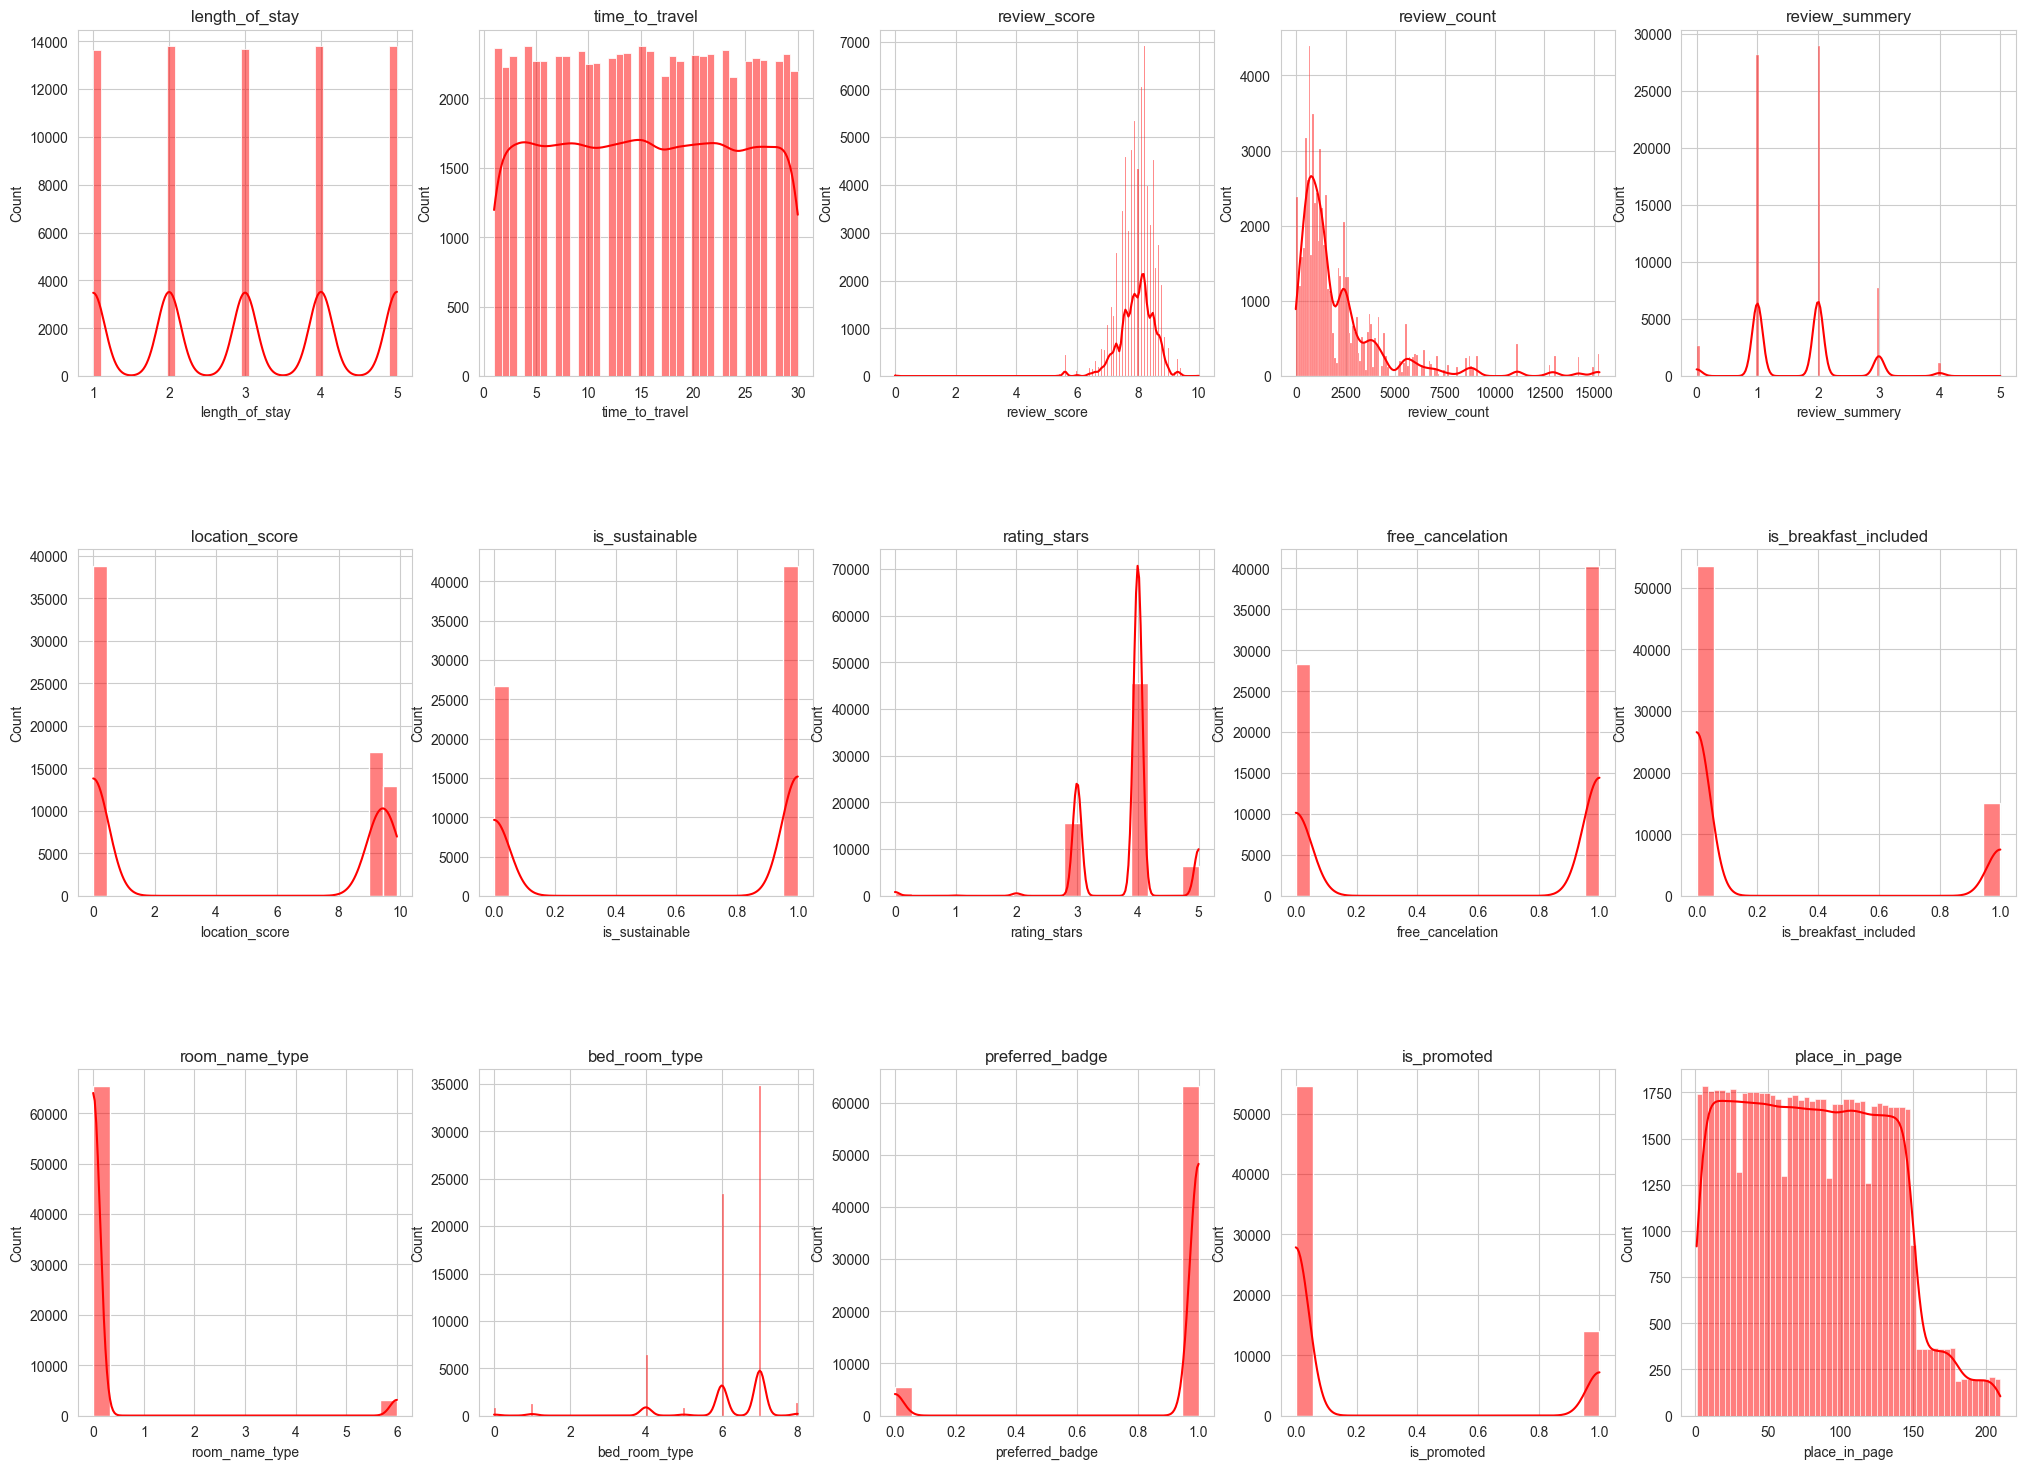

In [65]:
fig, axes = plt.subplots(nrows = 3,ncols= 5,figsize = (25,18),sharex = False)
fig.subplots_adjust(hspace = 0.5)
for col,ax in zip(X_gp,axes.flat):
    sns.histplot(x = col,data = X_gp,ax = ax,kde=True,color='red')
    ax.set_title(col,fontsize = 12)

let's normelaize the data

In [66]:
normal_booking_df = booking_df[["price","review_score","review_count","rating_stars","bed_room_type","distance_from_center_by_km"]]

In [67]:
normal_booking_df = normal_booking_df.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))
normal_booking_df.describe().T

count      mean       std  min   25%   50%  \
price                       68681.0  0.659726  0.208187  0.0  0.51  0.68   
review_score                68681.0  0.203144  0.059269  0.0  0.17  0.20   
review_count                68681.0  0.858538  0.158987  0.0  0.83  0.91   
rating_stars                68681.0  0.235337  0.132568  0.0  0.20  0.20   
bed_room_type               68681.0  0.222923  0.167744  0.0  0.12  0.12   
distance_from_center_by_km  68681.0  0.729548  0.208721  0.0  0.69  0.81   

                             75%  max  
price                       0.84  1.0  
review_score                0.24  1.0  
review_count                0.95  1.0  
rating_stars                0.20  1.0  
bed_room_type               0.25  1.0  
distance_from_center_by_km  0.86  1.0

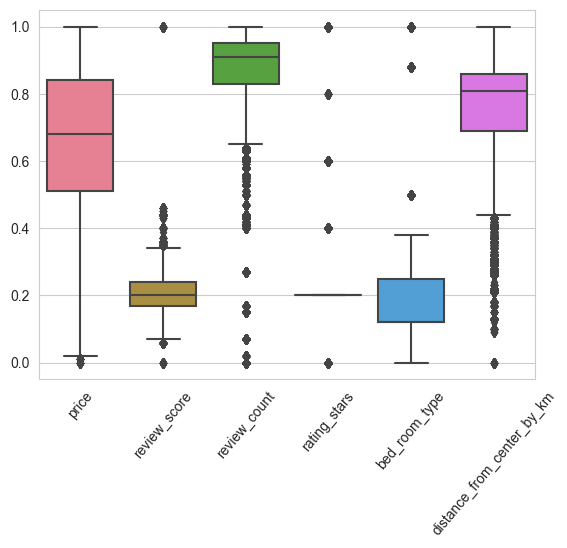

In [68]:
sns.boxplot(normal_booking_df)
plt.xticks(rotation=50)
plt.show()

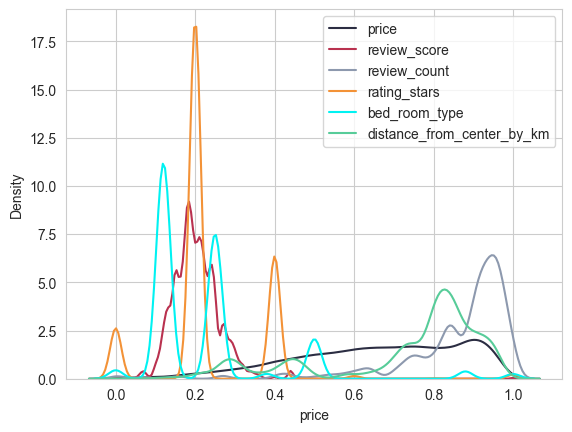

In [69]:
fig, ax = plt.subplots()
colors = ["#2B2D42", "#B9314F", "#8D99AE", "#F39237","#00F2F2","#57CC99","#FCFF4B","#FFE0B5","#6F732F"]
for i, col in enumerate(normal_booking_df.columns):
    sns.kdeplot(normal_booking_df[col], color=colors[i%len(colors)], ax=ax, label=col)
ax.legend()

In [70]:
y_norm_gp = normal_booking_df["price"]
x_norm_gp = normal_booking_df.drop("price",axis=1)

In [76]:
X_gp_train, X_gp_test, y_gp_train, y_gp_test = train_test_split(x_norm_gp, y_norm_gp, test_size=0.3,random_state=42)

In [77]:
X_full_gp_train, X_full_gp_test, y_full_gp_train,y_full_gp_test = train_test_split(X_gp_train,y_gp_train,train_size=1000,random_state=42)

In [78]:
X_full_gp_train.shape

(1000, 5)

In [79]:
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(30)
kernel2 = RBF(20)

In [80]:
gp_model = GaussianProcessRegressor(kernel = kernel)
for i in tqdm(range(100)):
    gp_model.fit(X_full_gp_train,y_full_gp_train)

100%|██████████| 100/100 [19:48<00:00, 11.88s/it]


In [81]:
gp_model_3 = GaussianProcessRegressor(kernel = kernel2)
for i in tqdm(range(100)):
    gp_model_3.fit(X_full_gp_train,y_full_gp_train)

  0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
  1%|          | 1/100 [00:00<00:26,  3.73it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
  2%|▏         | 2/100 [00:00<00:27,  3.62it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter

In [82]:
print("the gp_model_3 test score is: " ,gp_model_3.score(X_full_gp_test,y_full_gp_test))

the gp_model_3 test score is:  -2.229465249472112


<Figure size 500x500 with 0 Axes>

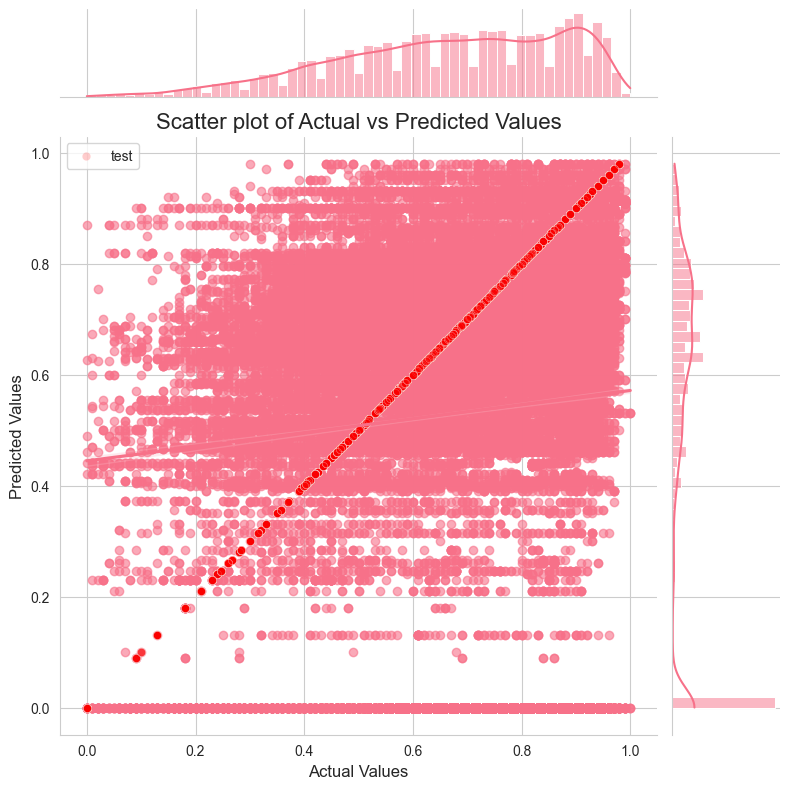

In [83]:
y_train_pred = gp_model_3.predict(X_full_gp_train)
y_test_pred = gp_model_3.predict(X_full_gp_test)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_full_gp_test, y=y_test_pred, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
sns.scatterplot(x = y_test_pred,y=y_test_pred, color="red", label="test",alpha=0.2)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

In [84]:
y_train_pred = gp_model.predict(X_full_gp_train)
y_test_pred = gp_model.predict(X_full_gp_test)

<Figure size 500x500 with 0 Axes>

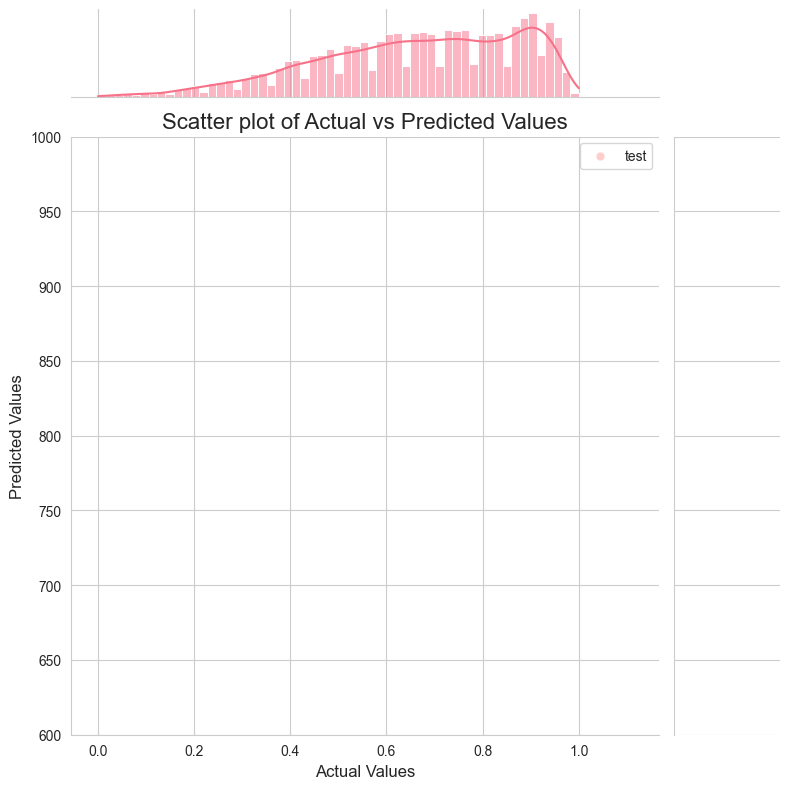

In [85]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_full_gp_test, y=y_test_pred, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
sns.scatterplot(x = y_test_pred,y=y_test_pred, color="red", label="test",alpha=0.2)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.ylim(600,1000)
plt.tight_layout()
plt.show()

In [86]:
r2_gp_ker1 = gp_model.score(X_full_gp_test,y_full_gp_test)
print("r2_score: ", r2_gp_ker1)

r2_score:  0.08965335052775325


In [87]:
mse = mean_squared_error(y_full_gp_test, y_test_pred)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, y_test_pred)
mae = mean_absolute_error(y_full_gp_test, y_test_pred)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

mse:  0.03958842022042839
rmse:  0.19896839000310676
mae:  0.16553786143460333
r2_score:  0.08965335052775325


lets change the kernels

Changing the kernel parameters didnt change the results of the guassian process regression

# random forest

In [88]:
y_rf = booking_df["price"]
X_rf = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)

In [89]:
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf,test_size=0.3, random_state=42)

In [94]:
rf = RandomForestRegressor()

In [96]:
for i in tqdm(range(100)):
    rf.fit(x_rf_train, y_rf_train)

100%|██████████| 100/100 [33:16<00:00, 19.96s/it]


In [97]:
importances = rf.feature_importances_
importances

array([7.28024274e-01, 4.81041031e-02, 4.64000247e-02, 3.19715750e-02,
       2.79552089e-03, 7.54269202e-03, 3.68805805e-03, 4.22578511e-02,
       3.65850292e-03, 3.43025603e-03, 5.84905623e-04, 9.42185793e-03,
       1.13695063e-03, 2.03919729e-03, 2.43541337e-02, 4.45900966e-02])

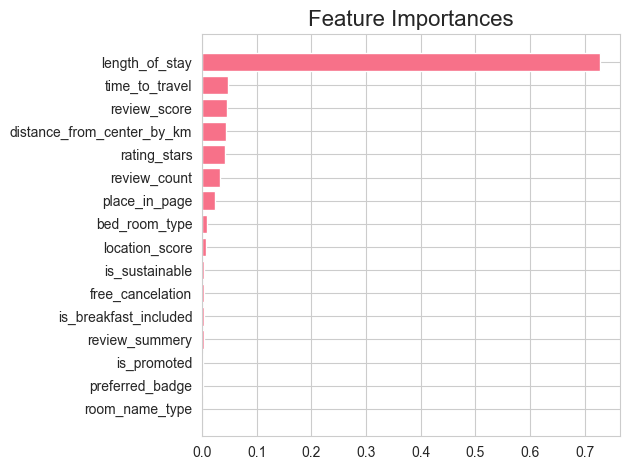

In [98]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_rf_train.columns)[indices])
plt.title("Feature Importances", fontsize=16)
plt.tight_layout()
plt.show()

In [99]:
rf_pred_train = rf.predict(x_rf_train)
rf_pred_test = rf.predict(x_rf_test)

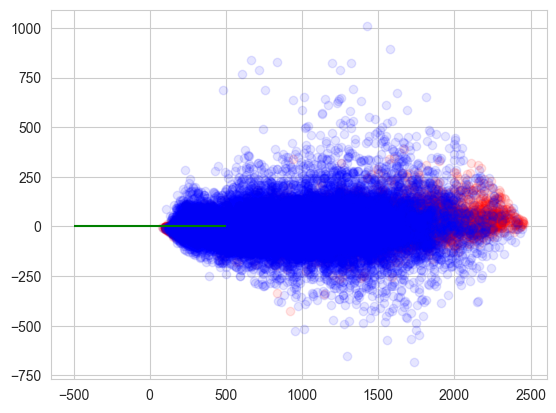

In [100]:
train = plt.scatter(rf_pred_train,y_rf_train-rf_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(rf_pred_test,y_rf_test-rf_pred_test, color="blue", label="test",alpha=0.1)
plt.hlines(xmin=-500,xmax =500,y=0,color="green")
plt.show()

<Figure size 500x500 with 0 Axes>

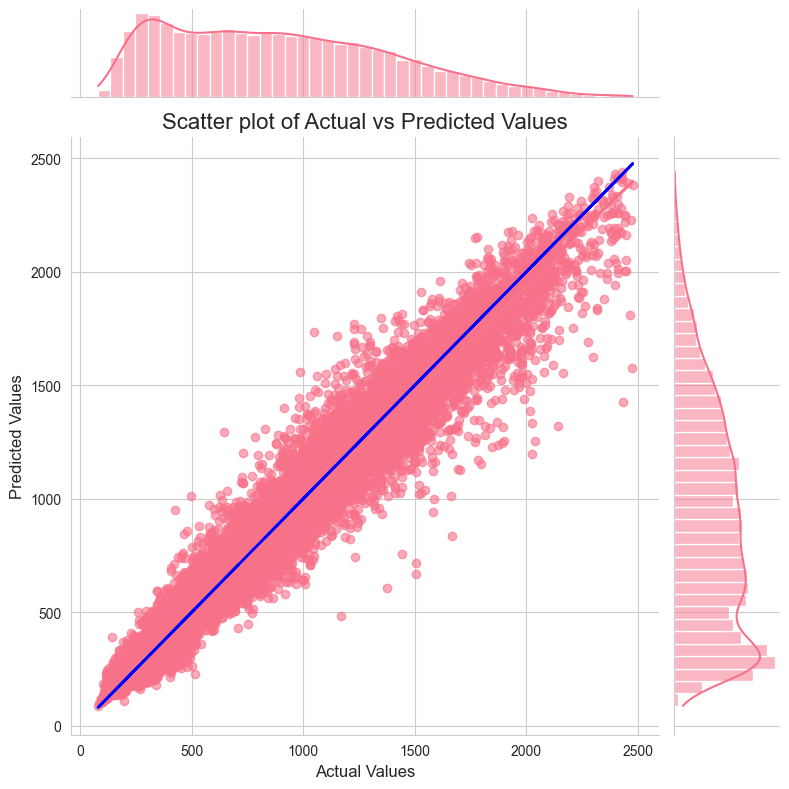

In [101]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_rf_test, y=rf_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_rf_test, y_rf_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

In [102]:
resid = y_rf_test - rf_pred_test

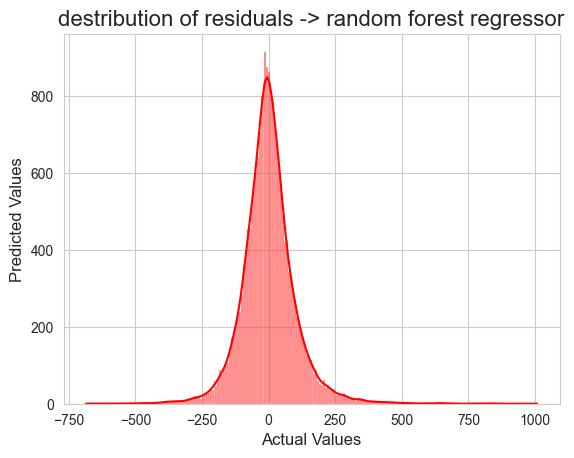

In [103]:
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> random forest regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()


In [104]:
mse = mean_squared_error(y_rf_test, rf_pred_test)
rmse = mse ** 0.5
r2_random_forest = r2_score(y_rf_test, rf_pred_test)
mae = mean_absolute_error(y_rf_test, rf_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_random_forest)

mse:  10377.20290026949
rmse:  101.86855697549412
mae:  71.10822074763408
r2_score:  0.9579862742546776


# SVR

### The main idea behind SVR is to find a hyperplane that best fits the data by minimizing the error between the predicted and actual values. The hyperplane is constructed based on a subset of the training data, called support vectors, which are the points closest to the hyperplane. The hyperplane is defined by a function that maps the input variables to the output variable. SVR works by optimizing a cost function that penalizes errors and controls the complexity of the model through regularization.

In [105]:
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend

y_svm = booking_df["price"]
X_svm = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)

In [106]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm,train_size=0.7, random_state=42)

In [107]:
x_svm_train

length_of_stay  time_to_travel  review_score  review_count  \
31265               2               9           8.7         522.0   
66089               2              27           8.2        3040.0   
3125                4               4           8.5         839.0   
21953               1              27           7.7        2179.0   
33325               1              12           7.6         839.0   
...               ...             ...           ...           ...   
37194               3              17           8.1         549.0   
6265                2               8           8.1        1261.0   
54886               5              11           8.3         317.0   
860                 5               1           8.2        1716.0   
15795               4              19           8.6        1634.0   

       review_summery  location_score  is_sustainable  rating_stars  \
31265             3.0             9.4               0           3.0   
66089             2.0             0.0               1           3.0   
3125              2.0             9.3               1           4.0   
21953             1.0             9.6               0           0.0   
33325             1.0             9.3               1           4.0   
...               ...             ...             ...           ...   
37194             2.0             0.0               0           3.0   
6265              2.0             0.0               0           4.0   
54886             2.0             9.5               1           3.0   
860               2.0             9.5               1           5.0   
15795             3.0             9.7               0           4.0   

       free_cancelation  is_breakfast_included  room_name_type  bed_room_type  \
31265                 0                      0               6              6   
66089                 0                      1               0              7   
3125                  0                      0               0              6   
21953                 1                      0               0              7   
33325                 0                      0               0              6   
...                 ...                    ...             ...            ...   
37194                 0                      1               0              7   
6265                  1                      0               0              7   
54886                 1                      1               0              7   
860                   0                      1               0              6   
15795                 1                      0               0              6   

       preferred_badge  is_promoted  place_in_page  distance_from_center_by_km  
31265                1            0            119                         1.5  
66089                1            0            137                         1.8  
3125                 1            1             73                         1.9  
21953                1            0              3                         2.0  
33325                1            0            141                         0.7  
...                ...          ...            ...                         ...  
37194                1            0            132                         2.5  
6265                 1            0            168                         5.8  
54886                1            0             81                         1.9  
860                  1            0             97                         1.4  
15795                1            1             18                         1.0  

[48076 rows x 16 columns]

In [116]:
svm = SVR()
parameters = {"C": [1, 3], "gamma": [0.01, 0.1]}

In [117]:
svm_hyper = GridSearchCV(svm,parameters)

In [119]:
for i in tqdm(range(100)):
     svm.fit(x_svm_train, y_svm_train)

  0%|          | 0/100 [02:31<?, ?it/s]


KeyboardInterrupt: 

In [54]:
svm_pred_train = svm.predict(x_svm_train)
svm_pred_test = svm.predict(x_svm_test)
print("predicted values for train set: ", svm_pred_train)
print("predicted values for test set: ", svm_pred_test)

predicted values for train set:  [871.68615192 816.06935082 866.46671956 ... 873.08082233 845.17284021
 846.72658735]
predicted values for test set:  [858.18968832 806.48002305 843.50896525 ... 825.71784499 874.27277297
 873.69227236]


In [55]:
resid_svm  = y_svm_test - svm_pred_test

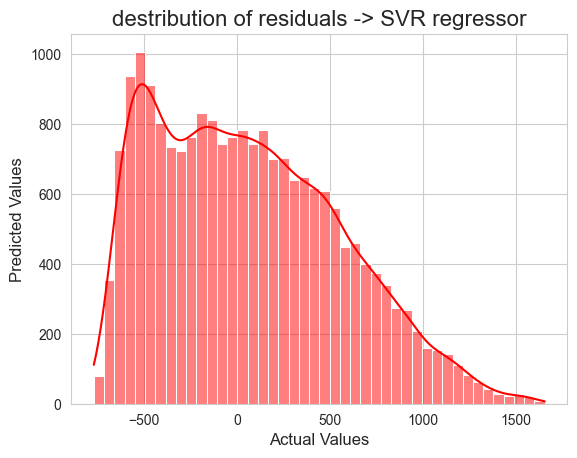

In [56]:
sns.histplot(resid_svm,kde=True,color='red')
plt.title("destribution of residuals -> SVR regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

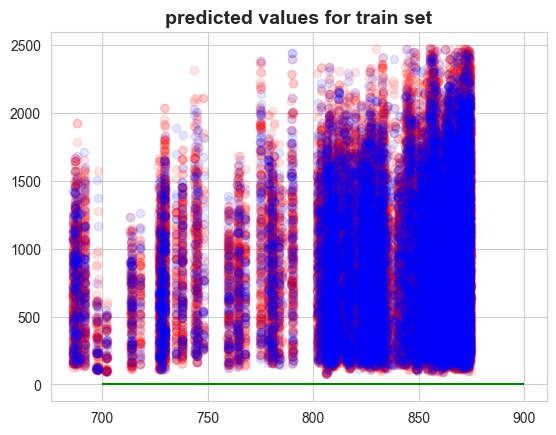

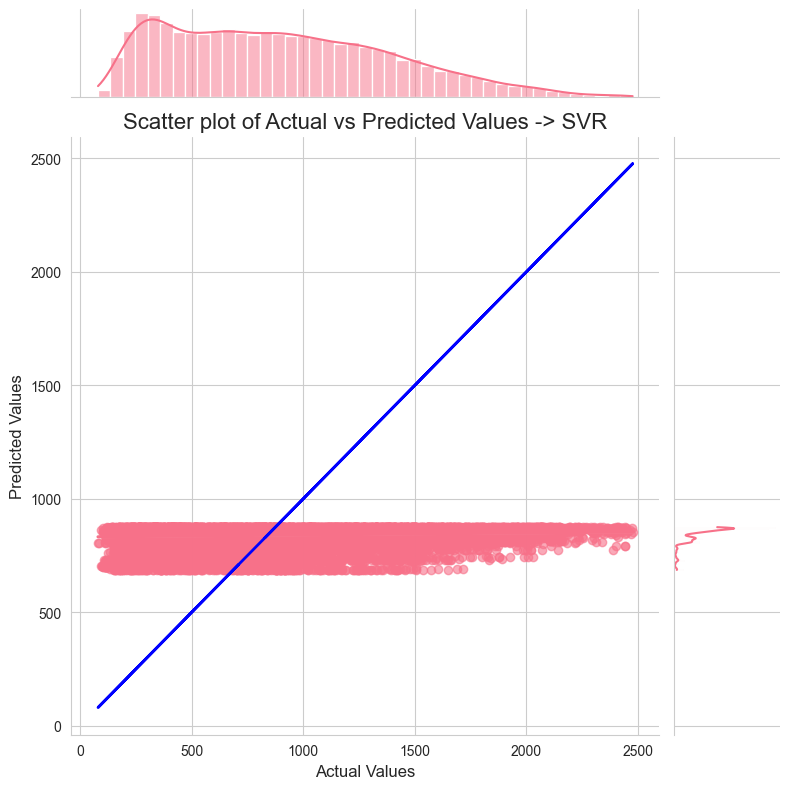

In [57]:
train = plt.scatter(svm_pred_train,y_svm_train, color="red", label="train",alpha=0.1)
test = plt.scatter(svm_pred_test,y_svm_test, color="blue", label="test",alpha=0.1)
plt.hlines(xmin=700,xmax =900,y=0,color="green")
plt.title("predicted values for train set", fontsize=14,fontweight="bold")
plt.show()

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_svm_test, y=svm_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_svm_test, y_svm_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values -> SVR", fontsize=16)
plt.tight_layout()
plt.show()

In [58]:
mse = mean_squared_error(y_svm_test, svm_pred_test)
rmse = mse ** 0.5
r2_svm = r2_score(y_svm_test, svm_pred_test)
mae = mean_absolute_error(y_svm_test, svm_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_svm)

mse:  247750.96790394635
rmse:  497.7458868779795
mae:  409.86878741147035
r2_score:  -0.0030584656279821765


In [59]:
accuracy = svm.score(x_svm_test, y_svm_test)
print("accuracy: ", accuracy)

accuracy:  -0.0030584656279821765


### lets see what happens with less fichers and norm data

In [60]:
svm_df_booking = booking_df[["price","review_score","review_count","rating_stars","bed_room_type","distance_from_center_by_km"]]
svm_df_booking.describe()

price  review_score  review_count  rating_stars  bed_room_type  \
count  68681.000000  68681.000000  68681.000000  68681.000000   68681.000000   
mean     895.506805      7.968563   2160.472838      3.823314       6.197464   
std      498.734940      0.592692   2426.522135      0.662839       1.326481   
min       80.040000      0.000000      0.000000      0.000000       0.000000   
25%      474.150000      7.600000    700.000000      4.000000       6.000000   
50%      841.000000      8.000000   1330.000000      4.000000       7.000000   
75%     1244.390000      8.300000   2578.000000      4.000000       7.000000   
max     2476.310000     10.000000  15273.000000      5.000000       8.000000   

       distance_from_center_by_km  
count                68681.000000  
mean                     2.665977  
std                      2.043892  
min                      0.000000  
25%                      1.400000  
50%                      1.900000  
75%                      3.000000  
max                      9.800000

In [61]:
x_svm = svm_df_booking.drop("price",axis=1)
y_svm = svm_df_booking["price"]
x_svm_train,x_svm_test,y_svm_train,y_svm_test = train_test_split(x_svm, y_svm,test_size=0.3, random_state=42)

In [62]:
svm_norm = SVR()

In [63]:
svm_norm.fit(x_svm_train, y_svm_train)

SVR()

In [64]:
print("accuracy: ", svm_norm.score(x_svm_test, y_svm_test))

accuracy:  -0.002997580618220974


it didnt improve so we can see that the model didnt change even with less fichers

# MLP regression

Multi-layer Perceptron regressor.
optimize the mse by using the gradient descent algorithm with multi layer perceptron

In [65]:
y_mlp = booking_df["price"]
X_mlp = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)

In [66]:
x_mlp_train, x_mlp_test, y_mlp_train, y_mlp_test = train_test_split(X_mlp, y_mlp,test_size=0.3, random_state=42)

In [67]:
mlp_model = MLPRegressor(random_state = 1,max_iter = 400)

In [68]:
mlp_model.fit(x_mlp_train, y_mlp_train)

MLPRegressor(max_iter=400, random_state=1)

In [69]:
mlp_pred_train = mlp_model.predict(x_mlp_train)
mlp_pred_test = mlp_model.predict(x_mlp_test)
print("predicted values for train set: ", mlp_pred_train)
print("predicted values for test set: ", mlp_pred_test)

predicted values for train set:  [ 587.09920699  681.64987234 1189.44732297 ... 1698.00297872 1712.76046609
 1451.16346497]
predicted values for test set:  [ 594.5650914   380.37923704 1155.57119216 ...  677.45720802  335.02385202
  974.34735047]


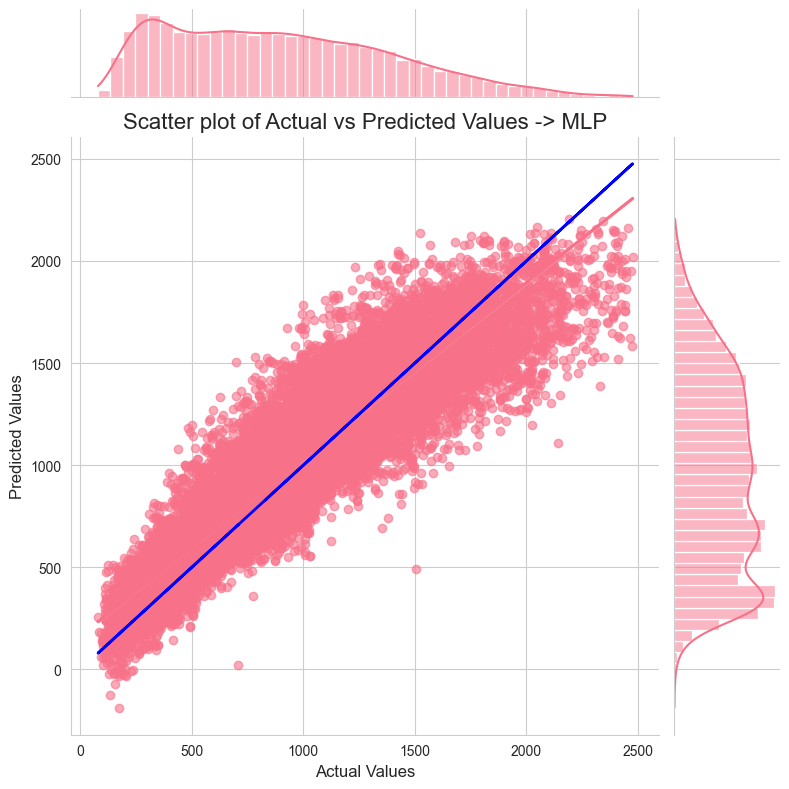

In [70]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_mlp_test, y=mlp_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_mlp_test, y_mlp_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values -> MLP", fontsize=16)
plt.tight_layout()
plt.show()

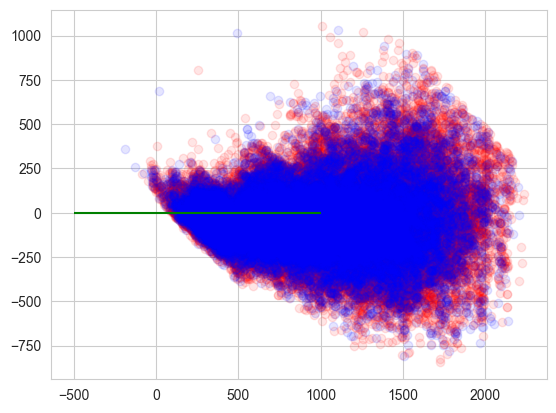

In [71]:
train = plt.scatter(mlp_pred_train,y_mlp_train-mlp_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(mlp_pred_test,y_mlp_test-mlp_pred_test, color="blue", label="test",alpha=0.1)
plt.hlines(y=0,xmin=-500,xmax =1000,color="green")
plt.show()

In [72]:
resid = y_mlp_test - mlp_pred_test

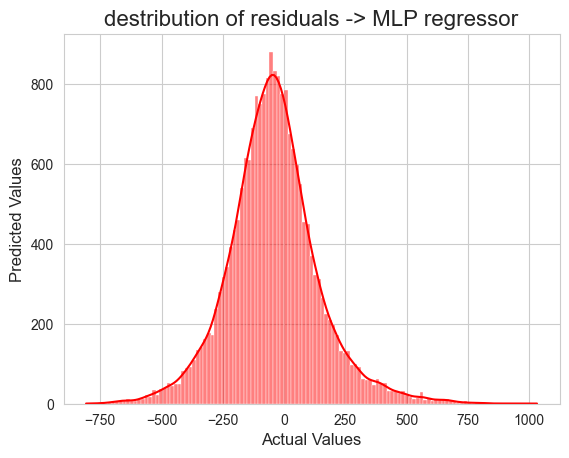

In [73]:
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> MLP regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

In [74]:
mse = mean_squared_error(y_mlp_test, mlp_pred_test)
rmse = mse ** 0.5
mae = mean_absolute_error(y_mlp_test, mlp_pred_test)
r2_mlp = r2_score(y_mlp_test, mlp_pred_test)


print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_mlp)

mse:  36243.78444769883
rmse:  190.37800410682647
mae:  143.81716358533802
r2_score:  0.853261381280436


let's see what happens with less fichers, we predict for price per night

In [75]:
booking_df_mlp = booking_df[["price_per_night","review_score","review_count","rating_stars","bed_room_type"]]
booking_df_mlp.describe()

price_per_night  review_score  review_count  rating_stars  \
count     68681.000000  68681.000000  68681.000000  68681.000000   
mean        296.825780      7.968563   2160.472838      3.823314   
std          82.431094      0.592692   2426.522135      0.662839   
min          71.920000      0.000000      0.000000      0.000000   
25%         238.320000      7.600000    700.000000      4.000000   
50%         291.300000      8.000000   1330.000000      4.000000   
75%         349.910000      8.300000   2578.000000      4.000000   
max         526.930000     10.000000  15273.000000      5.000000   

       bed_room_type  
count   68681.000000  
mean        6.197464  
std         1.326481  
min         0.000000  
25%         6.000000  
50%         7.000000  
75%         7.000000  
max         8.000000

In [76]:
x_mlp = booking_df_mlp.drop("price_per_night",axis=1)
y_mlp = booking_df_mlp["price_per_night"]

x_mlp_train,x_mlp_test,y_mlp_train,y_mlp_test = train_test_split(x_mlp, y_mlp,test_size=0.3, random_state=42)

In [77]:
mlp_model = MLPRegressor(random_state = 1,max_iter = 3000)

In [78]:
mlp_model.fit(x_mlp_train, y_mlp_train)

MLPRegressor(max_iter=3000, random_state=1)

In [79]:
mlp_model.score(x_mlp_test, y_mlp_test)
#even when we try to upgrade the max_iter it doesnt make the scoe higer, lets try to norm the review count

0.2742759715187493

In [80]:
booking_df_mlp = booking_df_mlp.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(3))

In [81]:
x_mlp = booking_df_mlp.drop("price_per_night",axis=1)
y_mlp = booking_df_mlp["price_per_night"]
x_mlp_train,x_mlp_test,y_mlp_train,y_mlp_test = train_test_split(x_mlp, y_mlp,test_size=0.3, random_state=42)
mlp_model = MLPRegressor(random_state = 1,max_iter = 3000)
mlp_model.fit(x_mlp_train, y_mlp_train)


MLPRegressor(max_iter=3000, random_state=1)

In [82]:
r2_mlp_norm = mlp_model.score(x_mlp_test, y_mlp_test)
print("r2_score_norm: ", r2_mlp_norm)

r2_score_norm:  0.2928936076537769


We have made a modest improvement to the model, however, the enhanced model did not yield a significant increase in its predictive capacity for determining the price per night

# adding features

### adding is weekend features

In [83]:
booking_df['is_weekend'] = ((pd.to_datetime(booking_df['check_in']).dt.dayofweek >= 5) |
                 (pd.to_datetime(booking_df['check_out']).dt.dayofweek >= 5)).astype(int)

In [84]:
booking_df["check_in_end_of_month"] = booking_df['check_in'].dt.is_month_end.astype(int)
booking_df["check_out_end_of_month"] = booking_df['check_out'].dt.is_month_end.astype(int)
booking_df['end_of_month'] = (booking_df["check_in_end_of_month"] | booking_df['check_out_end_of_month']).astype(int)

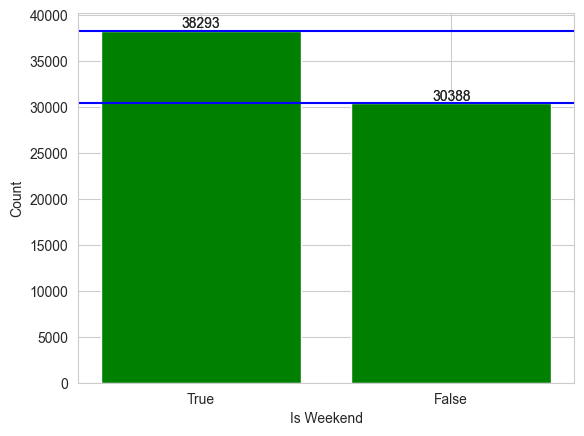

In [85]:
is_weekend_val = booking_df['is_weekend'].value_counts()
is_weekend_val.index.name = 'index'
#make bar plot
fig, ax = plt.subplots()
bars = ax.bar(is_weekend_val.index.map({1: 'True', 0: 'False'}), is_weekend_val.values,color='green')
ax.set_ylabel('Count')
ax.set_xlabel('Is Weekend')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, int(height),
            ha='center', va='bottom')
for i, count in enumerate(is_weekend_val.values):
    ax.axhline(y=count, linestyle='-', color='blue')
    ax.text(i, count+1, str(count), ha='center', va='bottom')

plt.show()

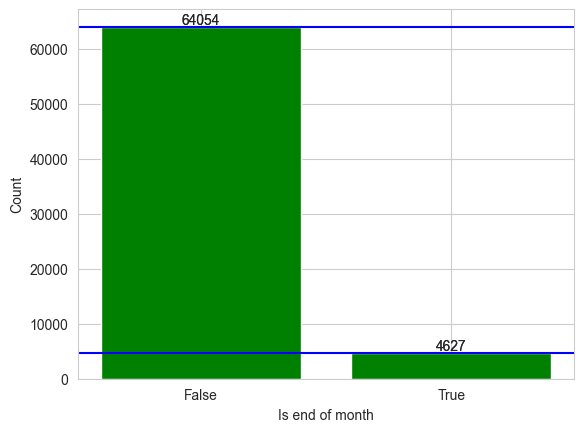

In [86]:
is_end_months = booking_df['end_of_month'].value_counts()
is_end_months.index.name = 'index'
#make bar plot
fig, ax = plt.subplots()
bars = ax.bar(is_end_months.index.map({1: 'True', 0: 'False'}), is_end_months.values,color='green')
ax.set_ylabel('Count')
ax.set_xlabel('Is end of month')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, int(height),
            ha='center', va='bottom')
for i, count in enumerate(is_end_months.values):
    ax.axhline(y=count, linestyle='-', color='blue')
    ax.text(i, count+1, str(count), ha='center', va='bottom')

plt.show()

/var/folders/cr/sz5qnpp96w183bm2h622d9yc0000gn/T/ipykernel_94735/3907142259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = booking_df.corr()


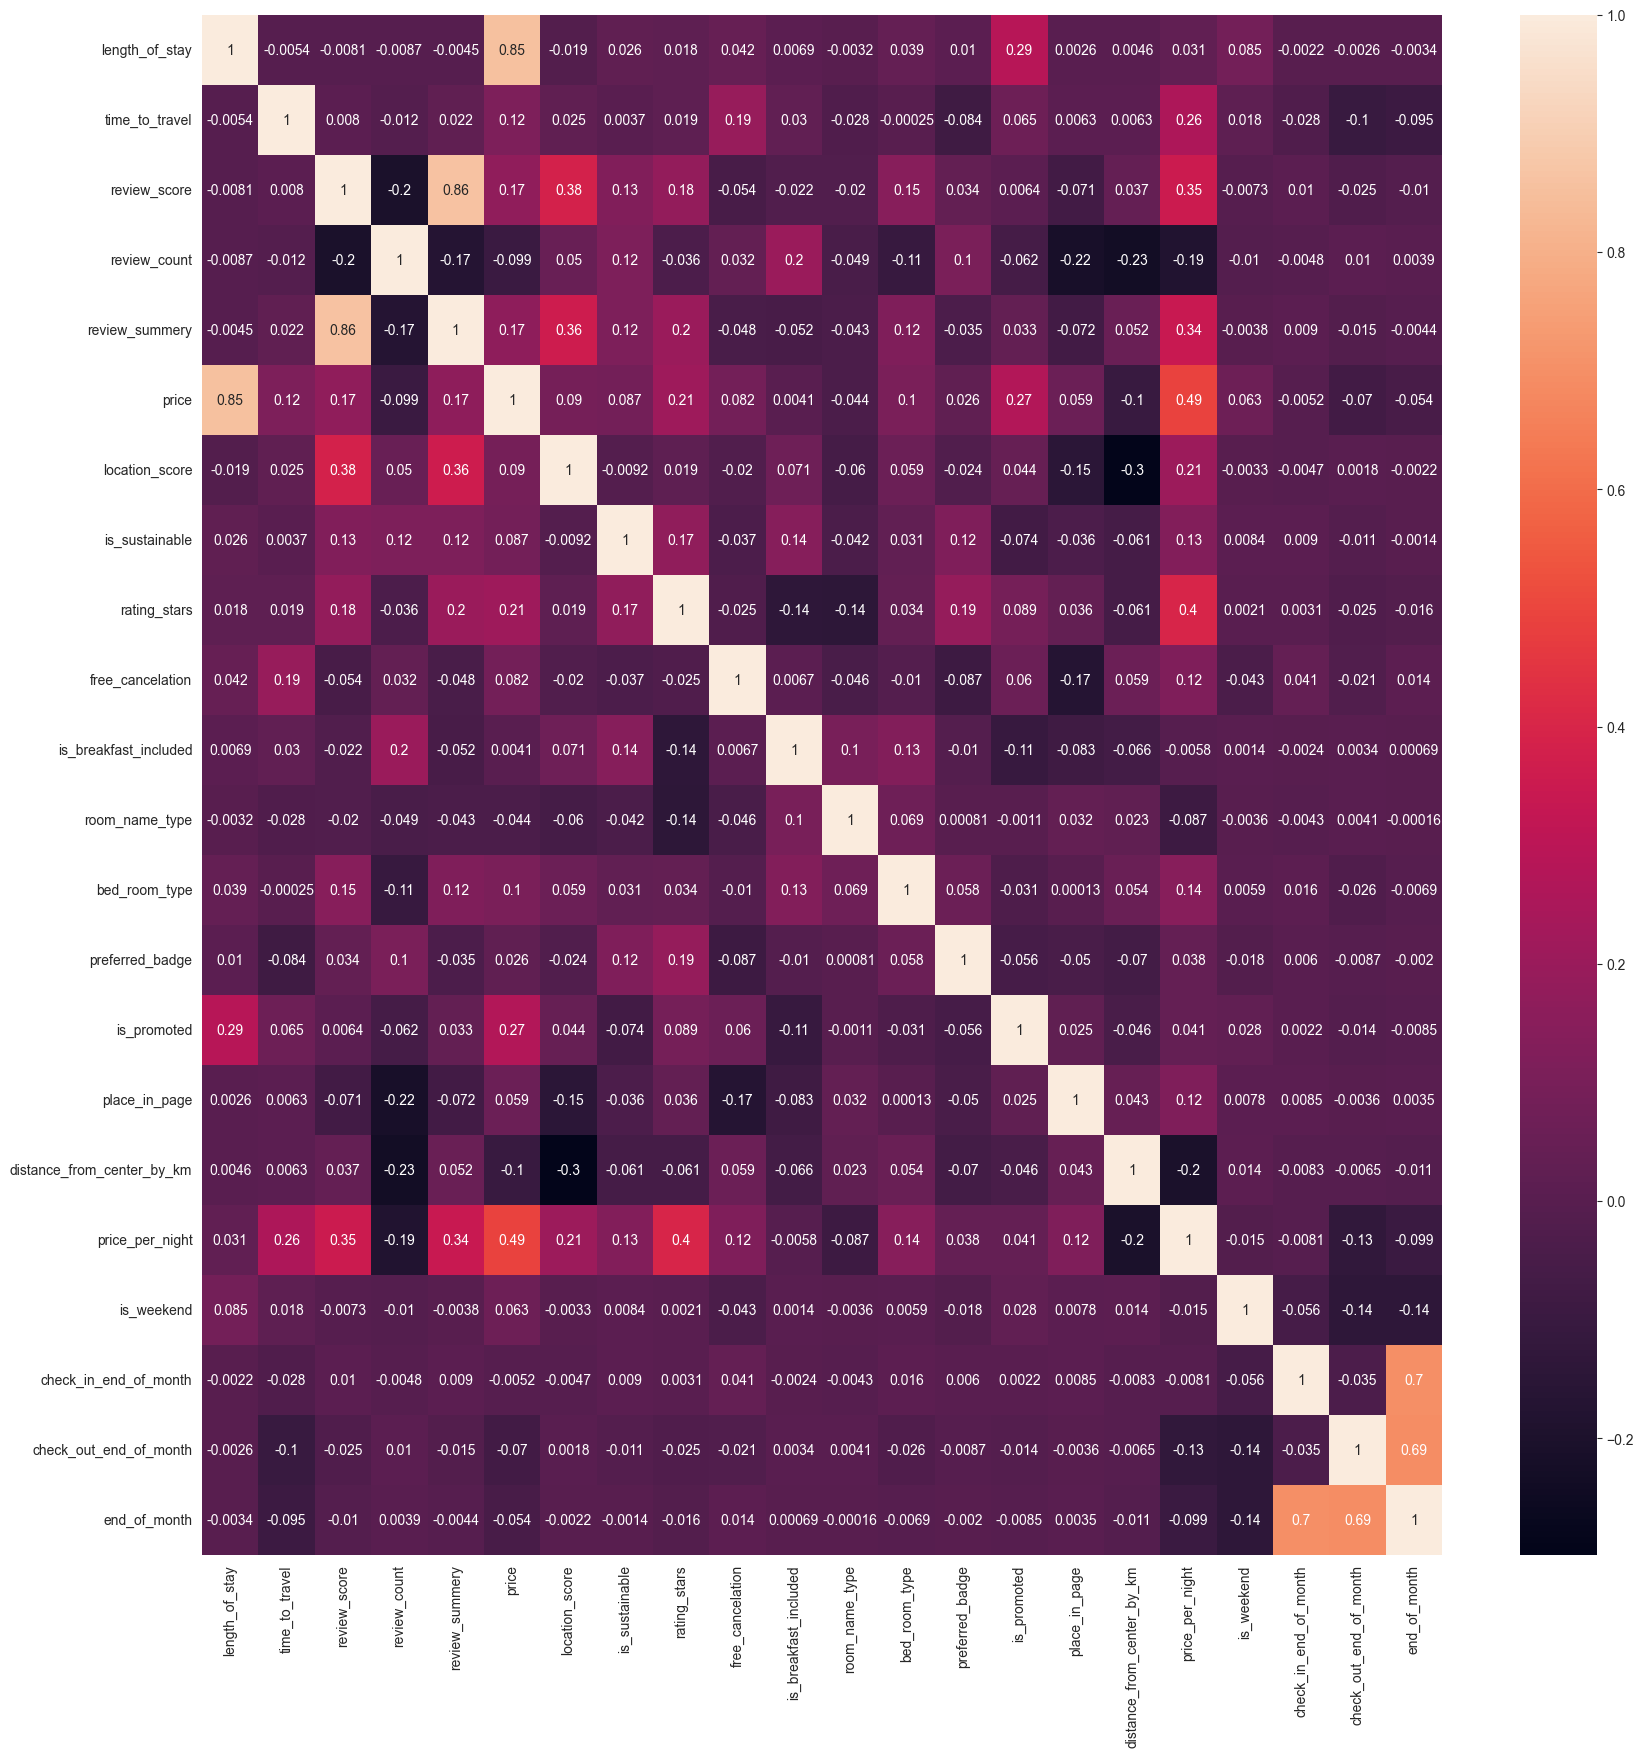

In [87]:
booking_df.describe()
corr = booking_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

In [88]:
X = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in","check_out_end_of_month","check_in_end_of_month"],axis=1)
y = booking_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
arr_of_models = []
mlp = MLPRegressor(random_state = 1,max_iter = 3000)
arr_of_models.append(mlp)
lreg = LinearRegression()
arr_of_models.append(lreg)
random_forest = RandomForestRegressor(random_state = 1)
arr_of_models.append(random_forest)
svr = SVR()
arr_of_models.append(svr)
descion_tree = DecisionTreeRegressor()
arr_of_models.append(descion_tree)

In [89]:
i = 1
r2_scores = []
for model in arr_of_models:
    model.fit(X_train, y_train)
    print(f'model number: {i}')
    print(f'score model: {model} ---> score is: {round(model.score(X_test, y_test),4)}')
    r2_scores.append(round(model.score(X_test, y_test),4))
    i = i + 1

model number: 1
score model: MLPRegressor(max_iter=3000, random_state=1) ---> score is: 0.8546
model number: 2
score model: LinearRegression() ---> score is: 0.8298
model number: 3
score model: RandomForestRegressor(random_state=1) ---> score is: 0.9586
model number: 4
score model: SVR() ---> score is: -0.0031
model number: 5
score model: DecisionTreeRegressor() ---> score is: 0.9195


we can see that adding fichers did not improve the predictive capacity for determining the price probably because of the weekend ficher that made from the check-in and check-out dates that are already included in the original dataset

## r2_score graph

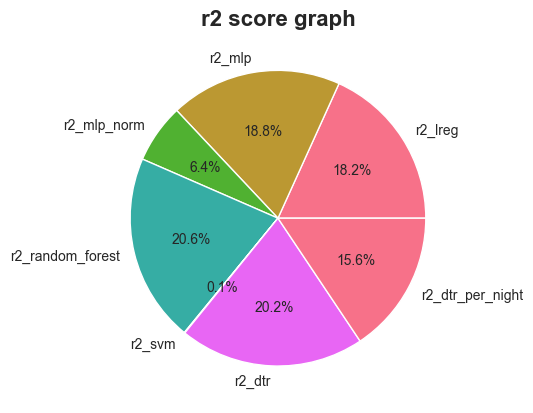

In [152]:
import matplotlib.pyplot as plt
r2 = [r2_lreg,r2_mlp,r2_mlp_norm,r2_random_forest,r2_svm*(-1),r2_dtr,r2_dtr_per_night]
labels = ['r2_lreg', 'r2_mlp', 'r2_mlp_norm', 'r2_random_forest', 'r2_svm', 'r2_dtr', 'r2_dtr_per_night']
plt.pie(r2, labels=labels, autopct='%1.1f%%')
plt.title("r2 score graph", fontsize=16, fontweight='bold')
plt.show()

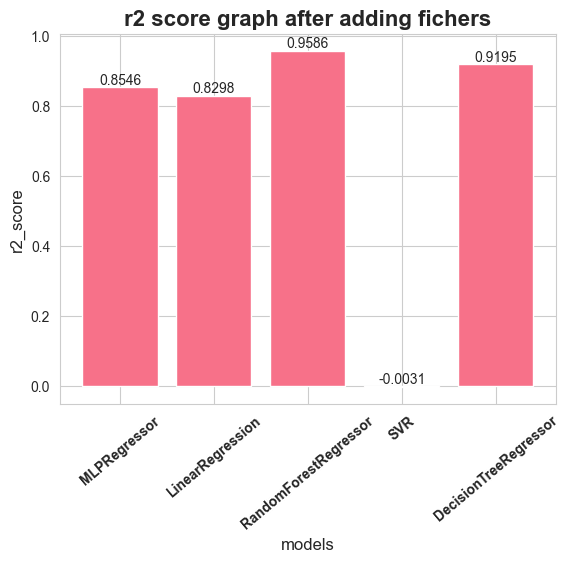

In [90]:
plt.bar(range(len(r2_scores)), r2_scores)
formatted_xticks = ['MLPRegressor', 'LinearRegression','RandomForestRegressor', 'SVR', 'DecisionTreeRegressor']
plt.xticks(range(len(r2_scores)), formatted_xticks, rotation=40,fontweight='bold')
plt.title("r2 score graph after adding fichers", fontsize=16,fontweight='bold')
plt.xlabel("models", fontsize=12)
plt.ylabel("r2_score", fontsize=12)

# add count value on top of each bar
for i, v in enumerate(r2_scores):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom', fontsize=10)

plt.show()

We can see that after adding the pitches it was not possible to improve the models and therefore there is no effect of the weekend or the end of the month on our ability to predict the price

## 25% train 75% test

we choose the random forest regressor After conducting a series of tests, the random forest regressor was selected due to its superior R2 score, thus deemed as the optimal model for our analysis.

In [91]:
y_rf = booking_df["price"]
X_rf = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in"],axis=1)
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf,test_size=0.75,train_size=0.25, random_state=42)

In [92]:
rf = RandomForestRegressor(n_estimators = 200,random_state = 42,oob_score = True)

In [93]:
rf.fit(x_rf_train, y_rf_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=42)

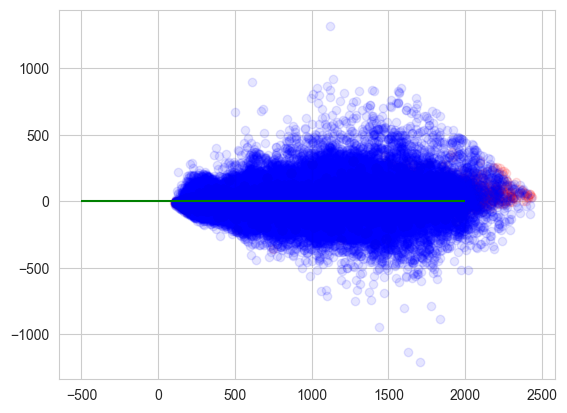

In [94]:
rf_pred_train = rf.predict(x_rf_train)
rf_pred_test = rf.predict(x_rf_test)

train = plt.scatter(rf_pred_train,y_rf_train-rf_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(rf_pred_test,y_rf_test-rf_pred_test, color="blue", label="test",alpha=0.1)
plt.hlines(xmin=-500,xmax =2000,y=0,color="green")
plt.show()

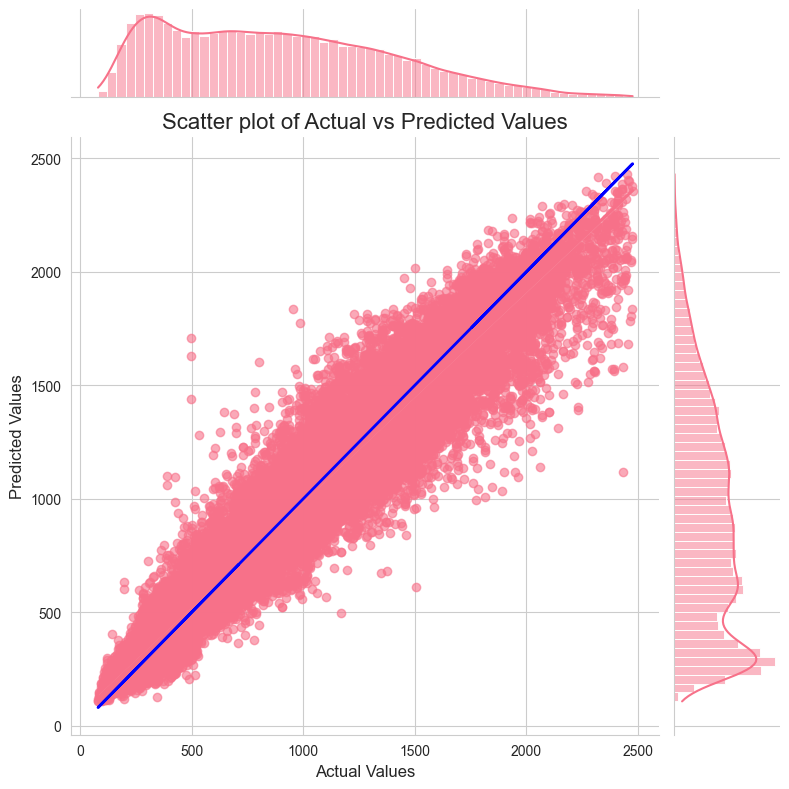

In [95]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_rf_test, y=rf_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_rf_test, y_rf_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

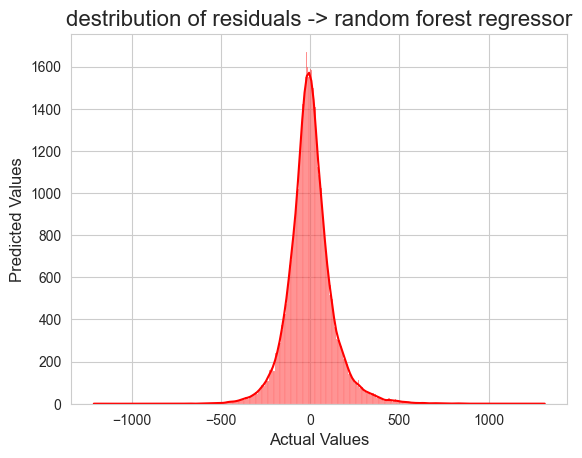

In [96]:
resid = y_rf_test - rf_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> random forest regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

In [97]:
mse = mean_squared_error(y_rf_test, rf_pred_test)
rmse = mse ** 0.5
r2_random_forest = r2_score(y_rf_test, rf_pred_test)
mae = mean_absolute_error(y_rf_test, rf_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_random_forest)

mse:  15715.5146396311
rmse:  125.36153572619912
mae:  88.75734273488511
r2_score:  0.9368923412336404


To summarize Phase 3 of our analysis, we found that the Random Forest Regressor model provided the best performance in predicting hotel room prices on the booking website dataset. This was evident from the fact that the model had the minimum error range and did not overfit.

## Bonus: we will try to run an optimization model to search for the best model to use against the existing data

In [19]:
from tpot import TPOTRegressor

X = booking_df.drop(["price","price_per_night","element","url","name","address","recommended_unit","check_out","check_in","check_out_end_of_month","check_in_end_of_month"],axis=1)
y = booking_df["price"]
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X, y)
print(tpot.fitted_pipeline_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -26254.92294986316

Generation 2 - Current best internal CV score: -26254.92294986316

Generation 3 - Current best internal CV score: -26254.92294986316

Generation 4 - Current best internal CV score: -26254.92294986316

Generation 5 - Current best internal CV score: -26254.92294986316

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=4, min_child_weight=11, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)
Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None

In [65]:
from xgboost import XGBRegressor

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
xgb = XGBRegressor(learning_rate=0.5, max_depth=4, min_child_weight=11, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)

In [69]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=11, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=1, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [70]:
xgb.score(x_test, y_test)

0.9498477944687419

In [71]:
pred_train = xgb.predict(x_train)
pred_test = xgb.predict(x_test)

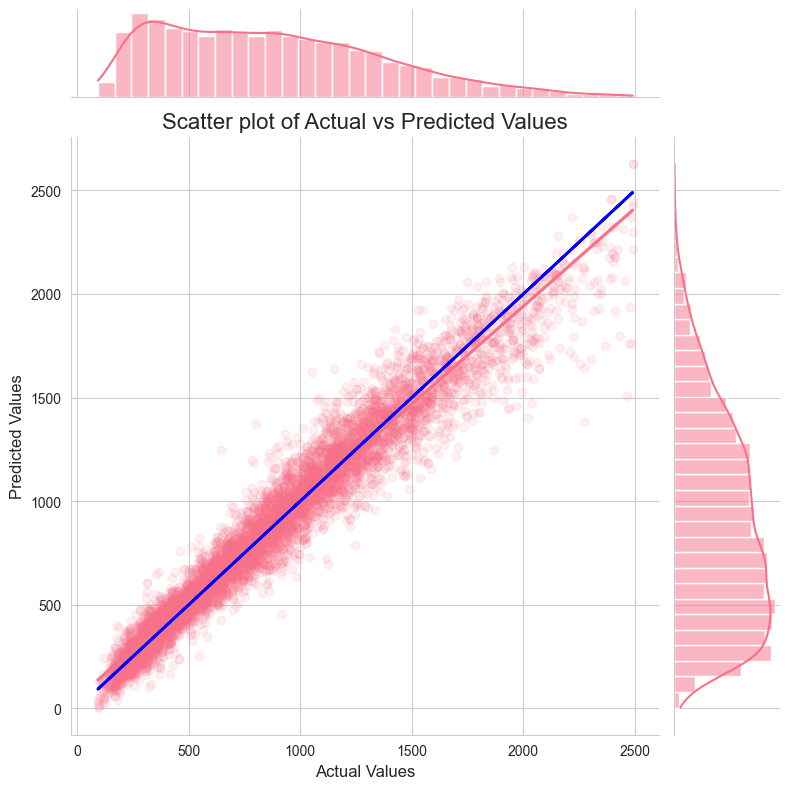

In [72]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.1)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

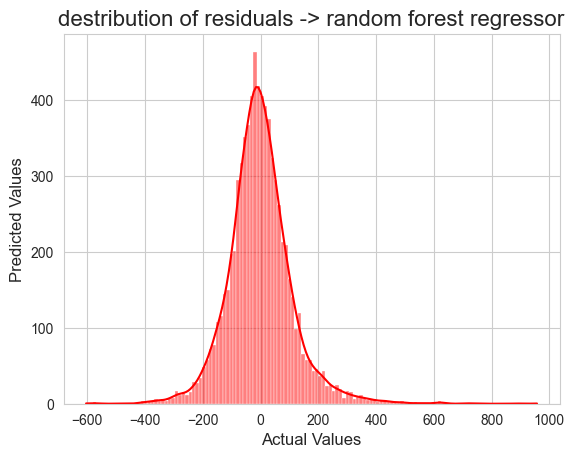

In [42]:
resid = y_test - pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> random forest regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

### let's try to run for 0.1 train and 0.9 test

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)

In [56]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=11, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=1, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [57]:
xgb.score(x_test, y_test)

0.9235443106025867

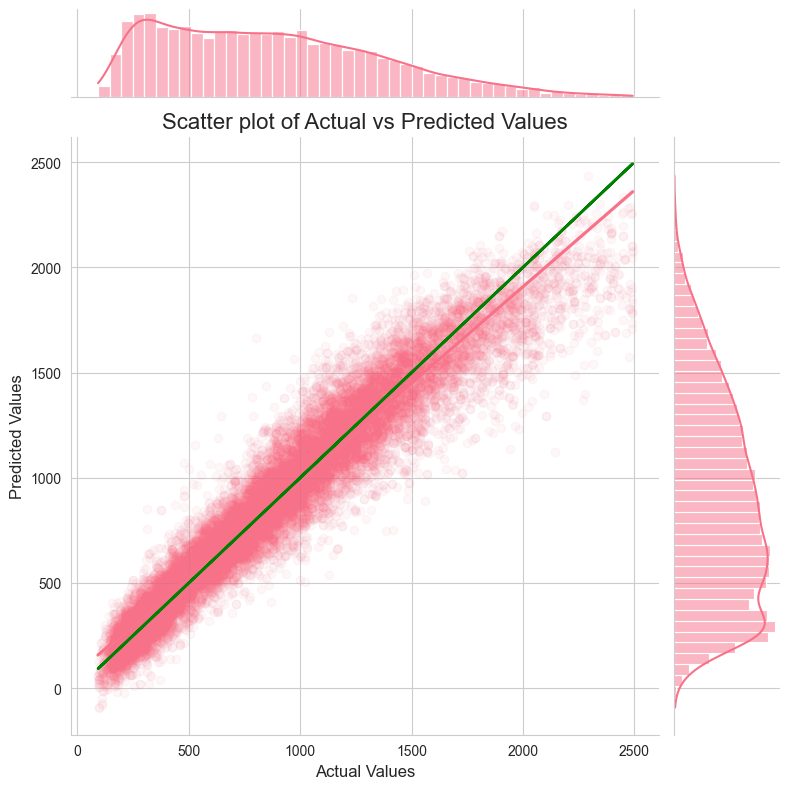

In [64]:
pred_train = xgb.predict(x_train)
pred_test = xgb.predict(x_test)
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.05)})
plt.plot(y_test, y_test, linewidth=2, color="green")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()# Define a list of hotels with their corresponding features

# Part 3 - prediction on Price

<img src=expedia-logo.png>

# Gaussian Regressor

### Gaussian Regressor is a type of regression model that assumes the target variable has a Gaussian (normal) distribution. The model works by estimating the mean and variance of the target variable given the predictor variables, and then predicting the target variable using the estimated mean. During training, the model learns the optimal values of the parameters that minimize the mean squared error between the predicted and actual target values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from datetime import date, timedelta, datetime
import re
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared
from sklearn.ensemble import RandomForestRegressor
from seleniumwire import webdriver
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time
from xgboost import XGBRegressor
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
expidiaDf = pd.read_csv("expidiaCDFF.csv")

In [61]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           53054 non-null  object 
 1   price                          54384 non-null  int64  
 2   Breakfast include              54384 non-null  int64  
 3   full refund                    54384 non-null  int64  
 4   reserve now pay later          54384 non-null  int64  
 5   rate out of 10                 54384 non-null  float64
 6   properties left at this price  54384 non-null  int64  
 7   number of reviews              54384 non-null  int64  
 8   check_in                       54384 non-null  object 
 9   check_out                      54384 non-null  object 
 10  TTT                            54384 non-null  int64  
 11  LOS                            54384 non-null  int64  
 12  time_stamp                     54384 non-null 

In [62]:
expidiaDf.drop(['name', 'price'],axis=1, inplace=True)

In [5]:
expidiaDf.describe().T

count         mean         std  min    25%  \
Breakfast include              54384.0     0.091773    0.288708  0.0    0.0   
full refund                    54384.0     0.479902    0.499601  0.0    0.0   
reserve now pay later          54384.0     0.434907    0.495749  0.0    0.0   
rate out of 10                 54384.0     7.963725    1.966660  0.0    8.0   
properties left at this price  54384.0     0.407454    0.491365  0.0    0.0   
number of reviews              54384.0  1027.186323  730.048472  0.0  760.0   
TTT                            54384.0    24.784587   13.070881  0.0   15.0   
LOS                            54384.0     3.968667    1.404052  2.0    3.0   
time_stamp                     54384.0     1.771348    0.828306  1.0    1.0   
pricefiltered                  54384.0   931.111191  574.449094  0.0  465.0   

                                  50%     75%     max  
Breakfast include                 0.0     0.0     1.0  
full refund                       0.0     1.0     1.0  
reserve now pay later             0.0     1.0     1.0  
rate out of 10                    8.4     8.8    10.0  
properties left at this price     0.0     1.0     1.0  
number of reviews              1005.0  1163.0  6102.0  
TTT                              24.0    35.0    49.0  
LOS                               4.0     5.0     6.0  
time_stamp                        2.0     3.0     3.0  
pricefiltered                   862.0  1326.0  2672.0

### lets get a remainder about how the graphs look like relative to the price

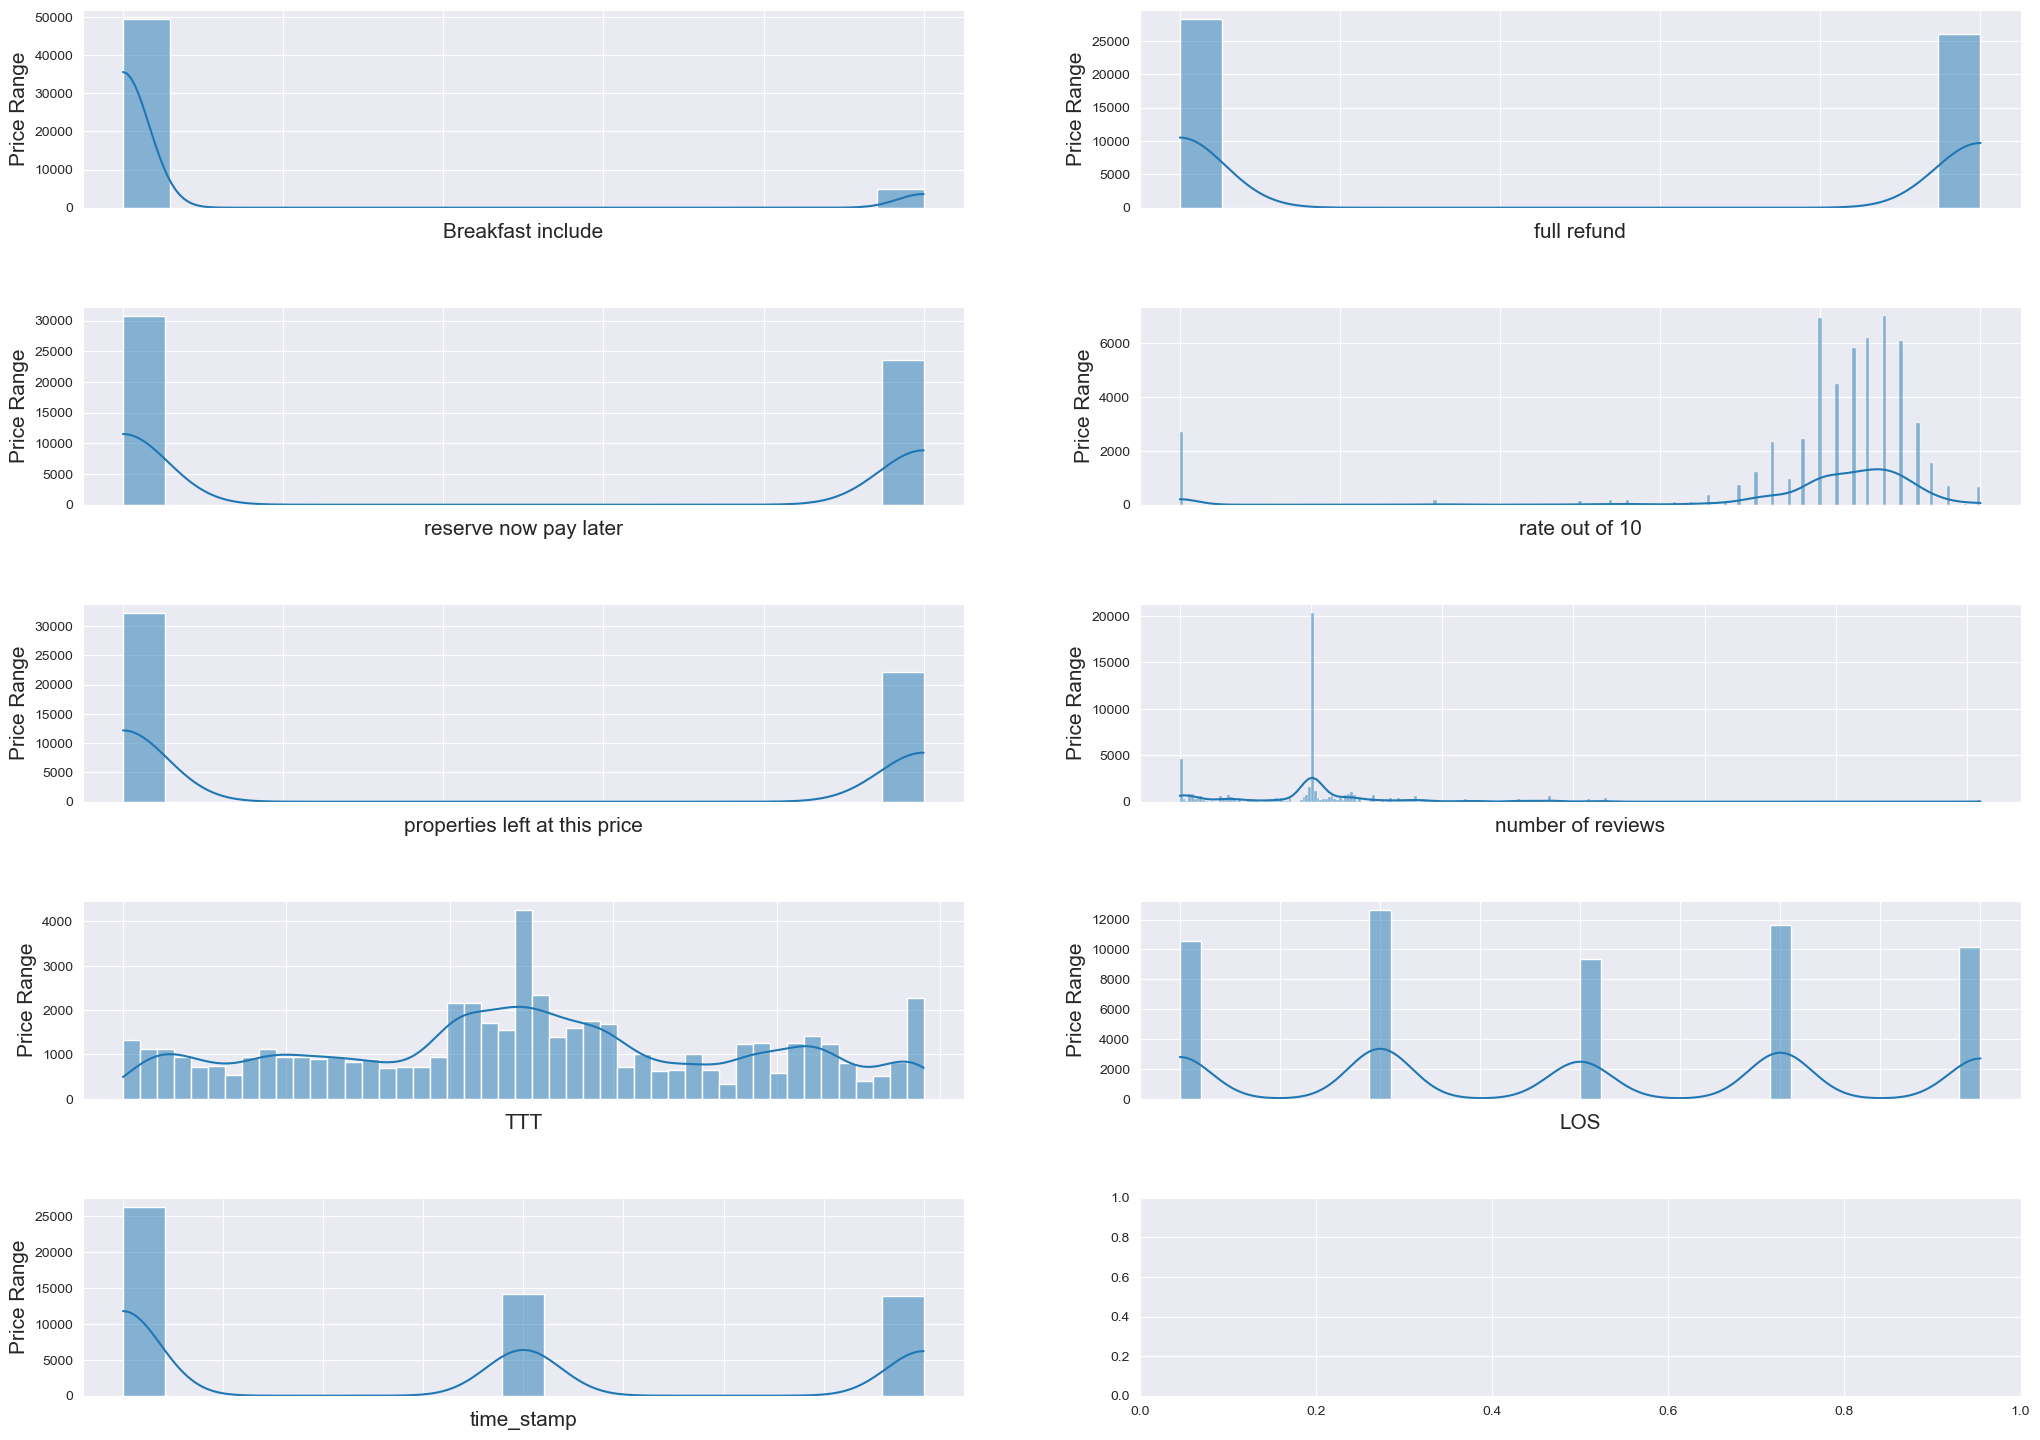

In [6]:
fig, axes = plt.subplots(nrows = 5,ncols= 2,figsize = (25,18))
fig.subplots_adjust(hspace = 0.5)
for col,ax in zip(expidiaDf, axes.flat):
    if col != 'pricefiltered':
        sns.histplot(x=col,data=expidiaDf,ax=ax,kde= True, palette="dark")
        ax.set_xlabel(col,fontsize=15)
        ax.set_ylabel('Price Range',fontsize=15)
        ax.set_xticklabels([])

## because we want to use Gaussian distribution we would like to see how they look on top of each other

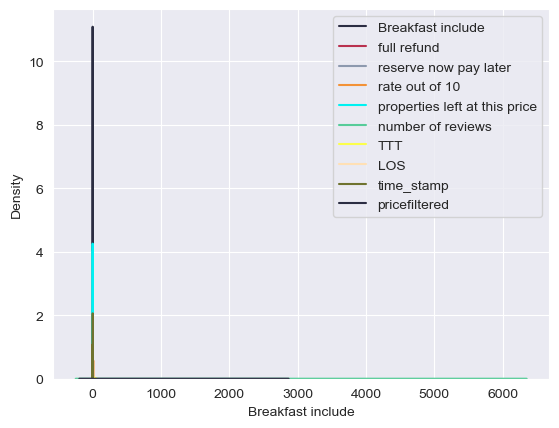

In [7]:
fig, ax = plt.subplots()
colors = ["#2B2D42", "#B9314F", "#8D99AE", "#F39237","#00F2F2","#57CC99","#FCFF4B","#FFE0B5","#6F732F"]
for i, col in enumerate(expidiaDf.columns[:]):
    sns.kdeplot(expidiaDf[col], color=colors[i%len(colors)], ax=ax, label=col)
ax.legend()

## We can see that there is a lot of mess so lets try to normelize the data and see what we get

In [8]:
scaled_df = expidiaDf.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))
scaled_df = scaled_df.dropna(0)

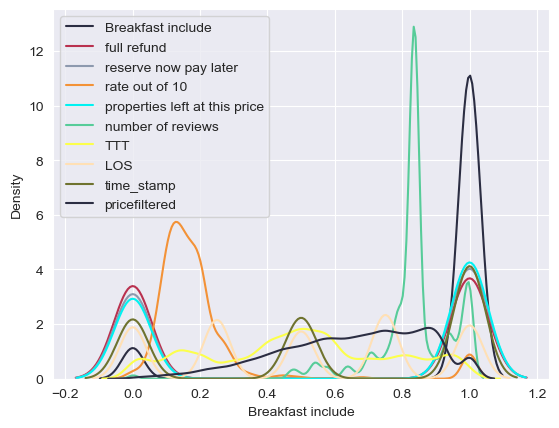

In [9]:
fig, ax = plt.subplots()
colors = ["#2B2D42", "#B9314F", "#8D99AE", "#F39237","#00F2F2","#57CC99","#FCFF4B","#FFE0B5","#6F732F"]
for i, col in enumerate(scaled_df.columns):
    sns.kdeplot(scaled_df[col], color=colors[i%len(colors)], ax=ax, label=col)
ax.legend()

## much better now we can work with all the dots that are on the grap and try to make a prediction with them

### we can see that there are a lot of the same graph with diffrent hights in the plot' so lets try to remove all the simiilar graph and try using geossian Reggrassion on the price graph

### for us to work with Gaussian Reggrassion we will need to find all the Intersection points of all the features  with the pricefiltered column

### Beacose we have a lot of data and running Gaussian Regrassion take a lot of time we took sample of 40% of the data to make it work faster

In [10]:
y = expidiaDf['pricefiltered']
X = expidiaDf.drop(["pricefiltered"], axis=1)

In [11]:
y_scale = scaled_df['pricefiltered']
X_scale = scaled_df.drop(["pricefiltered"], axis=1)

In [14]:
X_gp_train, X_gp_test, y_gp_train, y_gp_test = train_test_split(X_scale, y_scale, test_size=0.3,random_state=42)
X_full_gp_train, X_full_gp_test, y_full_gp_train,y_full_gp_test = train_test_split(X,y,train_size=2500,random_state=42)

In [15]:
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(30)
kernel2 = RBF(20)

In [16]:
model = GaussianProcessRegressor(kernel=kernel)

In [17]:
gp_model = GaussianProcessRegressor(kernel = kernel)
gp_model.fit(X_full_gp_train,y_full_gp_train)

GaussianProcessRegressor(kernel=1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=30))

In [19]:
y_pred_train, y_pred_test_std = model.predict(X_full_gp_train, return_std=True)
y_pred_test, y_test_std = model.predict(X_full_gp_test, return_std=True)

In [20]:
gp_model_3 = GaussianProcessRegressor(kernel = kernel2)
gp_model_3.fit(X_full_gp_train,y_full_gp_train)

GaussianProcessRegressor(kernel=RBF(length_scale=20))

In [21]:
print("the gp_model_3 test score is: " ,gp_model_3.score(X_full_gp_test,y_full_gp_test))

the gp_model_3 test score is:  -2.393690349995571


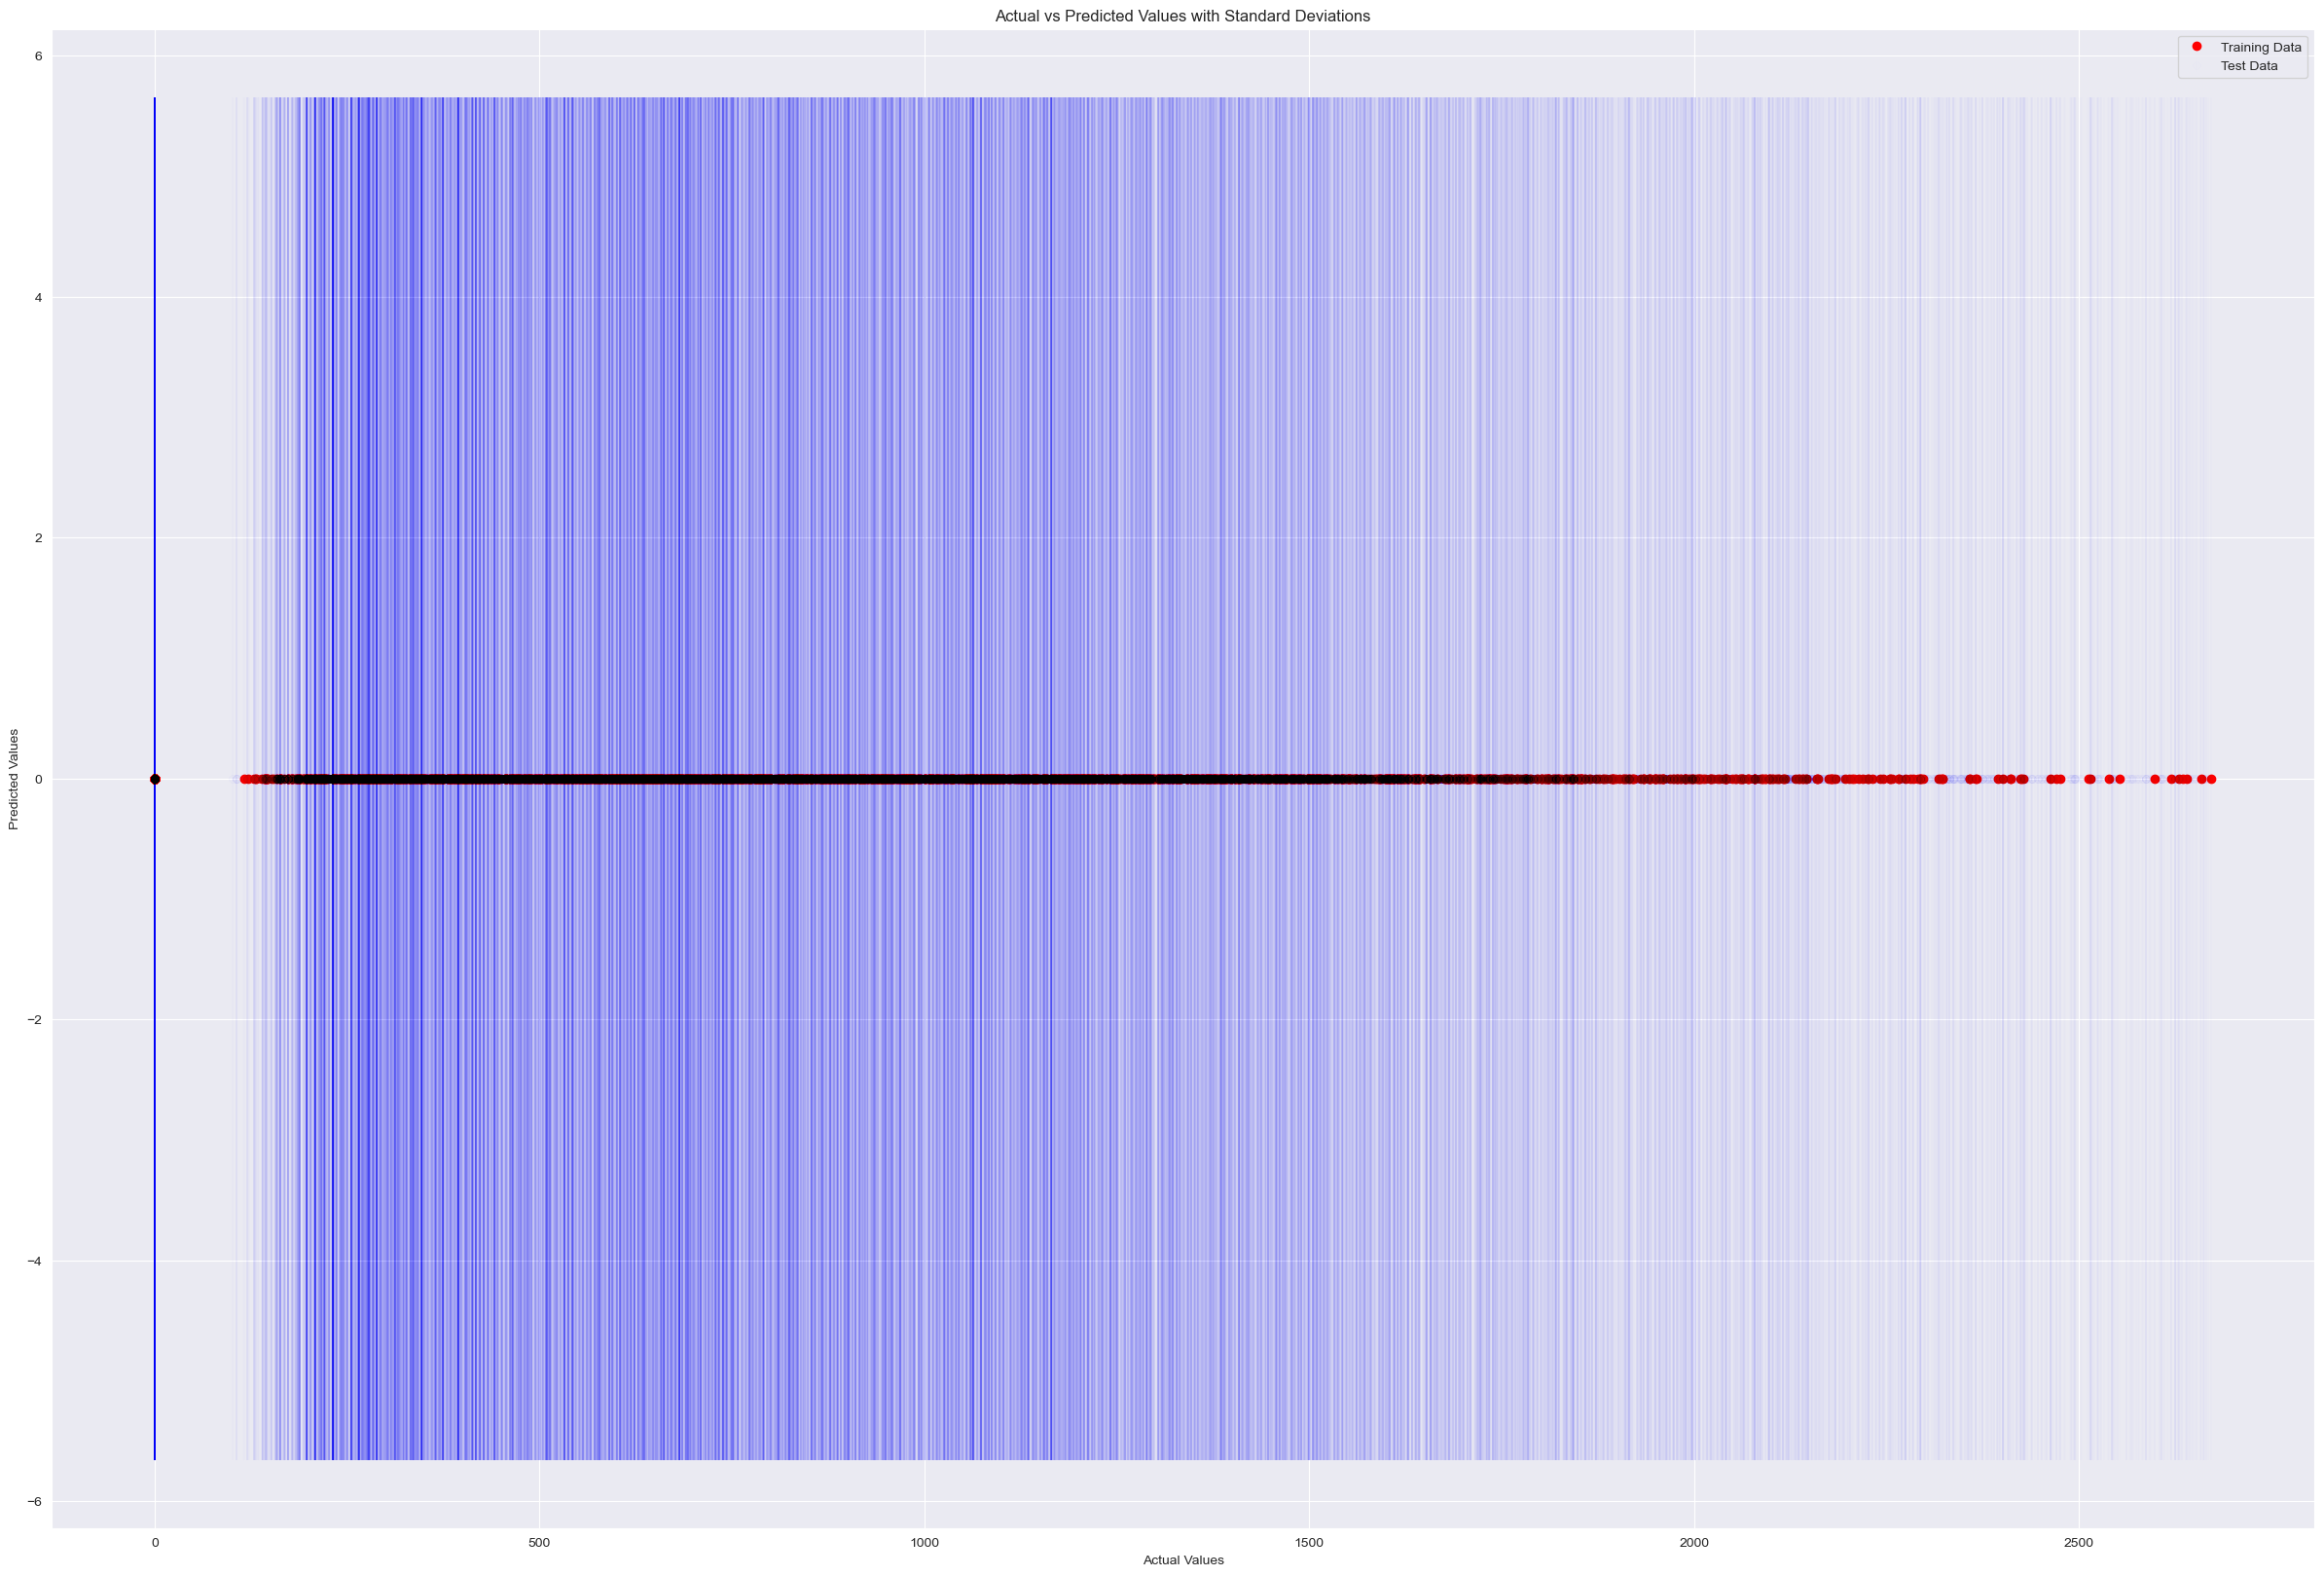

In [31]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(y_full_gp_train, y_pred_train, 'o', color='red', label='Training Data')
ax.errorbar(y_full_gp_test, y_pred_test, yerr=y_test_std, fmt='o', color='blue', label='Test Data', alpha=0.002)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs Predicted Values with Standard Deviations')
ax.legend()

In [26]:
mse = mean_squared_error(y_full_gp_test, y_test_pred)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, y_test_pred)
mae = mean_absolute_error(y_full_gp_test, y_test_pred)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

mse:  1120100.2944834689
rmse:  1058.3479080545626
mae:  872.4374373658139
r2_score:  -2.393690349995571


## what can we learn from that?

#### The MSE indicates that the model is making large errors on average
#### The R^2 value indicates how much of the variation in the target variable can be explained by the model. so beacose we negative score that mean that the model is performing worse than a simple horizontal line through the mean of the target variable
### In summary, when the MSE is very high like what we got, the MAE is above 800, and the R-squared is negative, it suggests that the model is not able to capture the underlying patterns in the data and is performing poorly in predicting the target variable.

# Desision Tree Regressor

### A Decision Tree Regressor in scikit-learn is a type of regression model that uses a tree-like structure to predict the target variable. The model works by recursively splitting the dataset into subsets based on the values of the predictor variables, such that each split maximizes the reduction in the variance of the target variable. At each leaf node, the model predicts the mean value of the target variable for the samples in that subset. During training, the model learns the optimal structure of the tree and the mean values at the leaf nodes that minimize the mean squared error between the predicted and actual target values.

In [9]:
expidiaDf = pd.read_csv("expidiaCDFF.csv")

In [10]:
lreg_tree_exspidia = DecisionTreeRegressor()
features= expidiaDf.drop(["price", "Breakfast include", "rate out of 10", "check_in","check_out",'name'],axis=1)
X = features
y = expidiaDf["price"]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)
lreg_tree_exspidia.fit(X_train, y_train)

DecisionTreeRegressor()

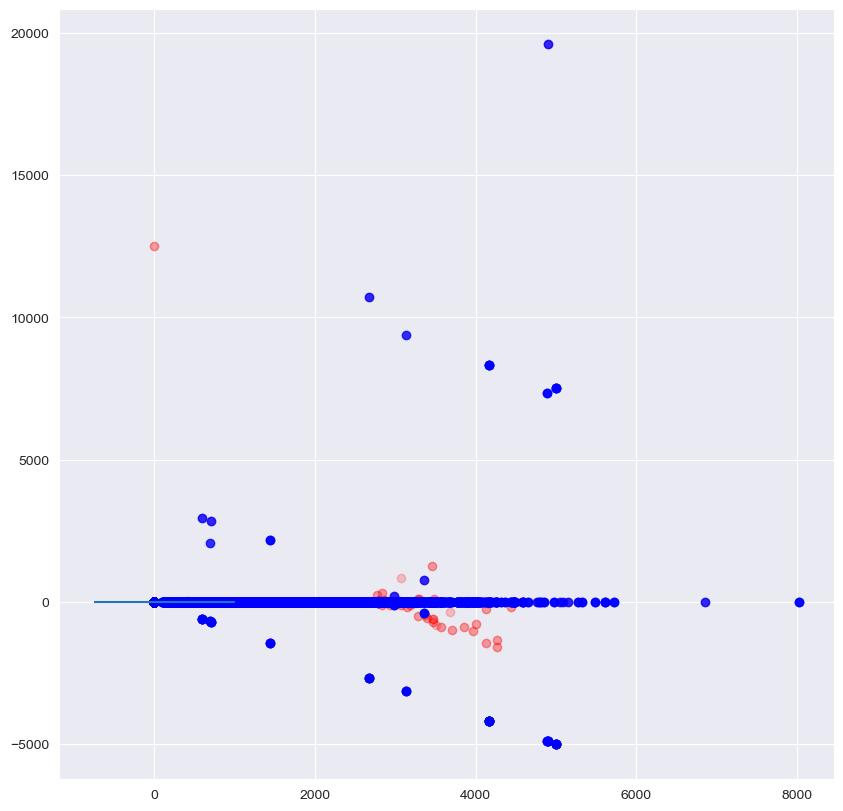

In [11]:
pred_test = lreg_tree_exspidia.predict(X_test)
pred_train = lreg_tree_exspidia.predict(X_train)
plt.figure(figsize=(10,10))
test = plt.scatter(pred_test, y_test-pred_test, color="red", label="test",alpha=0.2)
train = plt.scatter(pred_train, y_train-pred_train, color="blue", label="train",alpha=0.8)
plt.hlines(y=0,xmin=-750,xmax =1000)

In [12]:
resid = y_test - pred_test

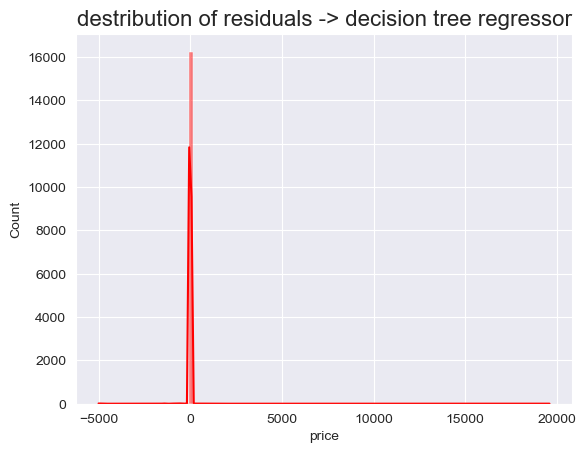

In [13]:
sns.histplot(resid, kde=True, color='red', bins=100)
plt.title("destribution of residuals -> decision tree regressor", fontsize=16)
plt.show()

In [14]:
mse = mean_squared_error(y_test, pred_test)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2)

mse:  66043.86844705946
rmse:  256.9900162400467
mae:  8.870907902263626
r2_score:  0.8624688776670262


## what we learn from that

#### The MSE value is relativevly high witch indicats that the model may be making large errores on avrage
#### The MAE is relatively low,
#### The R2 score suggests that the model explains a relatively high proportion of the variance in the target variable, which is a positive sign.

# Linear Regression

### A Linear Regressor in scikit-learn is a type of regression model that assumes a linear relationship between the predictor variables and the target variable. The model works by estimating the coefficients of the linear equation that best fits the training data, such that the sum of the squared differences between the predicted and actual target values is minimized. During training, the model learns the optimal values of the coefficients using a variety of methods such as Ordinary Least Squares or Gradient Descent.

In [15]:
features= expidiaDf.drop(["price", "Breakfast include", "rate out of 10", "pricefiltered", "check_in","check_out",'name'], axis=1)
X = features
y = expidiaDf["pricefiltered"]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

In [16]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
a,b =(lreg.coef_[0],lreg.intercept_)
y_pred = lreg.predict(X)

print("coeffiencs: ", str(lreg.coef_))
print("intercept:  ", str(lreg.intercept_))
print("MSE:        ", str(mean_squared_error(y,y_pred)))
print("RMSE:        ", str(mean_squared_error(y,y_pred)**0.5))
print("R^2:        ", str(r2_score(y,y_pred)))

coeffiencs:  [ 9.00166943e+01  1.69783300e+01  4.65096026e+01  4.45036228e-02
  6.78115827e+00  2.79855439e+02 -4.86101634e+01]
intercept:   -378.20049504538133
MSE:         163428.56569964194
RMSE:         404.2629907617589
R^2:         0.504740450880668


#

Text(0.5, 1.0, 'Actual vs Predicted Price')

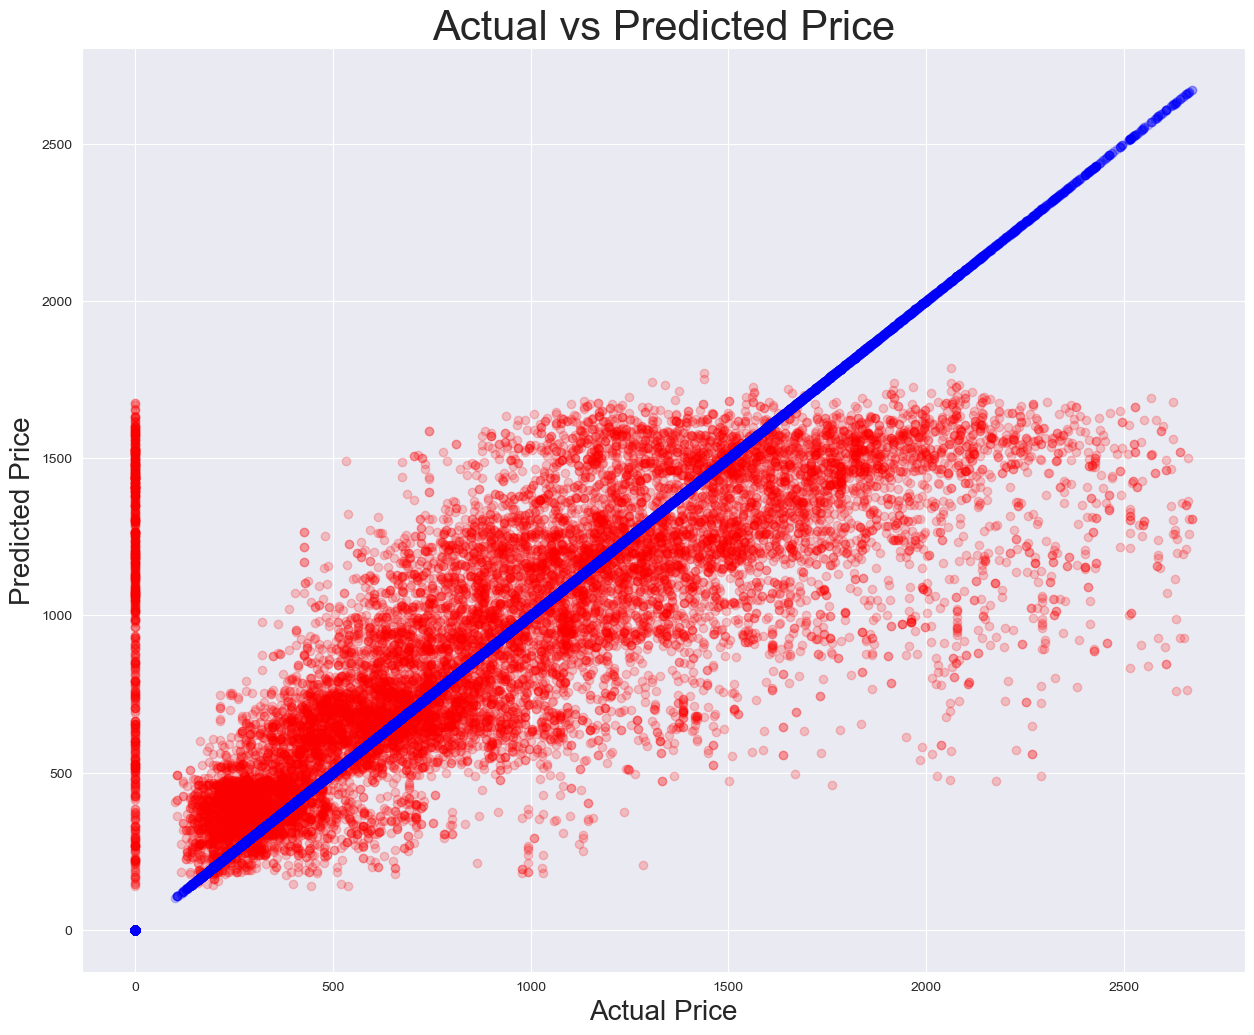

In [17]:
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)
heu = [y_train_pred, y_test_pred]
plt.figure(figsize=(15,12))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.2, label='Predicted')
plt.scatter(y_test, y_test, color='blue', alpha=0.2, label='Actual')

plt.xlabel('Actual Price', size = 20)
plt.ylabel('Predicted Price', size= 20)
plt.title('Actual vs Predicted Price', size =30)


## we can see here that the linear prediction that we made isnt that good beacouse we only got 0.5 in the R^2 score close to the real price of the hotels

### Coefficients: The coefficients indicate the strength and direction of the relationship between each predictor variable and the response variable. In this case, we can see that the variables with the largest coefficients are the sixth variable (279.855) and the first variable (90.016). This suggests that these two variables have the strongest influence on the response variable.
### Intercept: The intercept is the value of the response variable when all predictor variables are zero. In this case, the intercept is negative (-378.20), which means that the response variable is expected to be negative when all predictor variables are zero.
### MSE and RMSE: The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are measures of the difference between the predicted values and the actual values. The MSE in your model is 163428.57, which indicates that there is a large amount of variability that is not accounted for by the model. The RMSE is 404.26, which means that the average difference between the predicted and actual values is about 404.26 units.
### R^2: The R-squared value is a measure of how well the model fits the data. An R-squared of 0.50 indicates that the model explains about 50% of the variability in the response variable. This suggests that the model has some predictive power, but there is still a significant amount of variability that is not accounted for by the model.

## lets see what else we can do

In [18]:
expidiaDf["price_per_night"] = expidiaDf["pricefiltered"]/expidiaDf["LOS"]
from sklearn.model_selection import train_test_split
features= expidiaDf.drop(["price", "Breakfast include", "rate out of 10", "pricefiltered", "check_in","check_out","price_per_night",'name'], axis=1)
X = features
y = expidiaDf["price_per_night"]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

In [19]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
a,b =(lreg.coef_[0],lreg.intercept_)

y_pred = lreg.predict(X)

print("coeffiencs: ", str(lreg.coef_))
print("intercept:  ", str(lreg.intercept_))
print("MSE:        ", str(mean_squared_error(y,y_pred)))
print("RMSE:        ", str(mean_squared_error(y,y_pred)**0.5))
print("R^2:        ", str(r2_score(y,y_pred)))

coeffiencs:  [ 1.93505068e+01  9.23197286e+00  9.56344231e+00  5.52557930e-03
  1.68018518e+00  1.70458418e+01 -1.28515904e+01]
intercept:   115.95713343254428
MSE:         9009.481806576126
RMSE:         94.91829015830471
R^2:         0.10791730445442416


Text(0.5, 1.0, 'Actual Price per night vs Predicted Price per night')

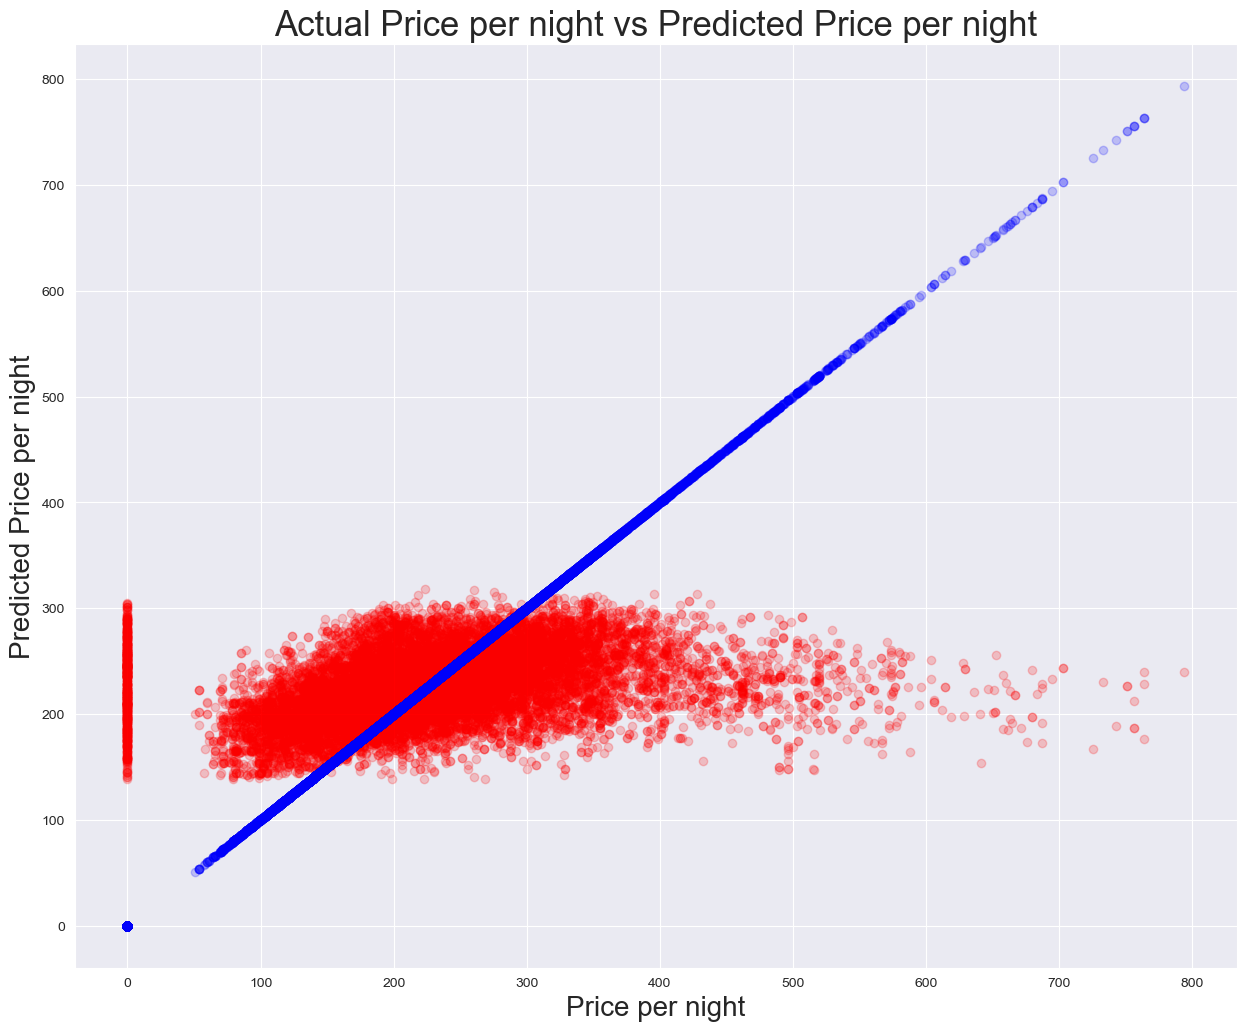

In [20]:
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)
heu = [y_train_pred, y_test_pred]
plt.figure(figsize=(15,12))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.2, label='Predicted')
plt.scatter(y_test, y_test, color='blue', alpha=0.2, label='Actual')

plt.xlabel('Price per night', size = 20)
plt.ylabel('Predicted Price per night', size= 20)
plt.title('Actual Price per night vs Predicted Price per night', size =25)

### we can see that this kind of prediction isn't that good in this case because if we order a few nights and only one night the prices will always be different and there is

## this time our prediction inst very good beacouse we dont realy see the linear graph getting the best predictions

# Gradient Boosting Regressor

### Random Gradient Boosting Regressor is a machine learning algorithm in scikit-learn that uses an ensemble of decision trees to make predictions. It works by training multiple decision trees on random subsets of the data, where each tree is optimized to reduce the error of the previous tree. This technique of building multiple trees is called boosting. Additionally, the algorithm randomly selects a subset of features to split on at each node, which helps to reduce overfitting. The final prediction is the weighted average of the predictions from all the trees in the ensemble.

In [21]:
features= expidiaDf.drop(["price", "Breakfast include", "rate out of 10", "check_in","check_out","name"], axis=1)
X = features
y = expidiaDf["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [23]:
reg = ensemble.GradientBoostingRegressor()

In [24]:
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [25]:
reg_pred_train = reg.predict(X_train)
reg_pred_test = reg.predict(X_test)

In [26]:
reg_score = cross_val_score(reg, X_train, y_train)
print(reg_score)

[0.85749099 0.89788426 0.90254555 0.78789947 0.83813272]


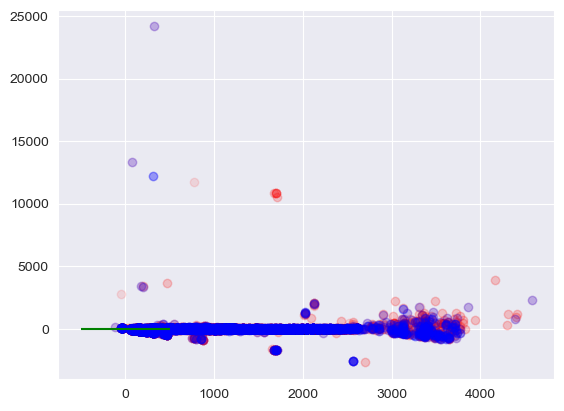

In [27]:
train = plt.scatter(reg_pred_train,y_train-reg_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(reg_pred_test,y_test-reg_pred_test, color="blue", label="test",alpha=0.2)
plt.hlines(xmin=-500,xmax =500,y=0,color="green")
plt.show()

In [28]:
resid = y_test - reg_pred_test

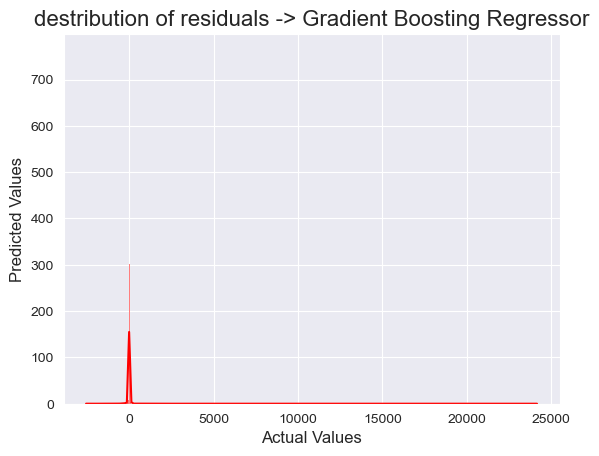

In [29]:
resid = y_test - reg_pred_test

sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> Gradient Boosting Regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

In [30]:
mse = mean_squared_error(y_test, reg_pred_test)
rmse = mse ** 0.5
r2 = r2_score(y_test, reg_pred_test)
mae = mean_absolute_error(y_test, reg_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2)

mse:  79013.17735341031
rmse:  281.0928269333999
mae:  28.992895519581836
r2_score:  0.8354613196345456


### waht we learn from this model:
### MSE: which suggests that there is still some room for improvement in the model's accuracy.

### RMSE which indicates that the model's predictions are off by an average of 281.09 units.

### MAE: indicates that the model's predictions are off by an average of 28.99 units.

### R-Squared (R2) Score: the model explains 83.5% of the variance in the dependent variable.
#### Overall, the given results indicate that the gradient boosting regressor is performing reasonably well in terms of accuracy and predictive power

# MLP

### A Multi-Layer Perceptron (MLP) Regressor in scikit-learn is a type of neural network that uses multiple layers of interconnected nodes to predict the target variable. The model works by first transforming the input data using one or more hidden layers of nonlinear activation functions, and then outputting a prediction using a linear activation function in the output layer. During training, the model learns the optimal weights for the connections between the nodes using backpropagation, which iteratively adjusts the weights to minimize the mean squared error between the predicted and actual target values.

In [31]:
mlp_model = MLPRegressor(random_state = 1,max_iter = 400)
features= expidiaDf.drop(["price", "Breakfast include", "rate out of 10", "check_in","check_out",'name'], axis=1)
X = features
y = expidiaDf["price"]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

In [32]:
mlp_model.fit(X_train, y_train)

MLPRegressor(max_iter=400, random_state=1)

In [33]:
mlp_pred_train = mlp_model.predict(X_train)
mlp_pred_test = mlp_model.predict(X_test)
print("predicted values for train set: ", mlp_pred_train)
print("predicted values for test set: ", mlp_pred_test)

predicted values for train set:  [ 328.21188243 2317.02486196  547.07622824 ...  205.21114769  659.80419622
  794.21928567]
predicted values for test set:  [ 683.85688137  802.33215322 3338.09688495 ...  622.26950978  313.39914749
 1287.78983691]


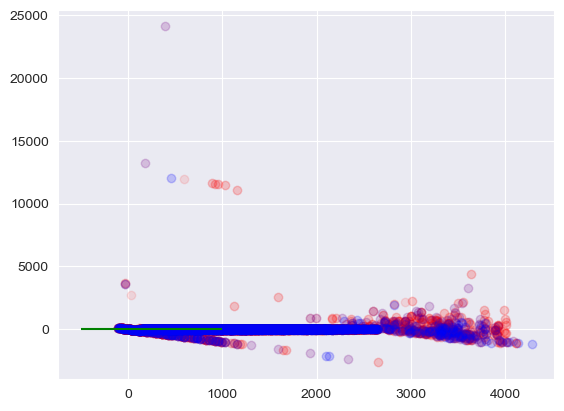

In [34]:
train = plt.scatter(mlp_pred_train,y_train-mlp_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(mlp_pred_test,y_test-mlp_pred_test, color="blue", label="test",alpha=0.1)
plt.hlines(y=0,xmin=-500,xmax =1000,color="green")
plt.show()

In [35]:
resid = y_test - mlp_pred_test

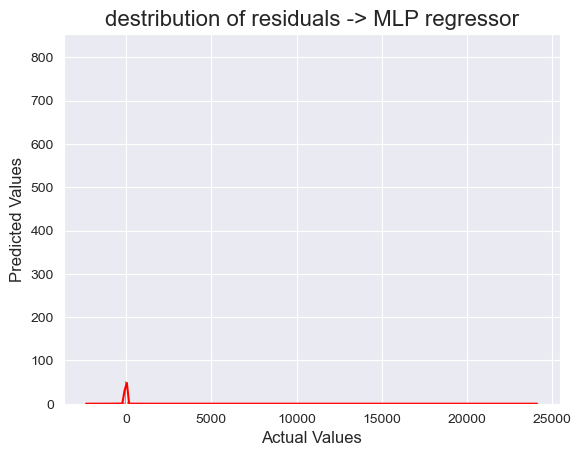

In [36]:
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> MLP regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

In [37]:
mse = mean_squared_error(y_test, mlp_pred_test)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, mlp_pred_test)
r2 = r2_score(y_test, mlp_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2)

mse:  77762.60105679392
rmse:  278.859464707214
mae:  28.71748317454683
r2_score:  0.8380655456691628


## what we learn here:
### MSE: In this case, the MSE is 77762.601, which suggests that the model is doing a good job at minimizing the errors.

### RMSE: In this case, the RMSE is 278.859, which indicates that the model's predictions are off by an average of 278.859 units.

### MAE: In this case, the MAE is 28.717, which indicates that the model's predictions are off by an average of 28.717 units.

### R^2 Score: In this case, the R2 score is 0.838, which suggests that the model explains 83.8% of the variance in the dependent variable.

# Random Forest

### Random Forest is an ensemble learning algorithm that creates a collection of decision trees, where each tree is trained on a random subset of the data and features. During training, the algorithm selects a random set of features to use for each tree, and then creates decision trees using those features. When making predictions, each tree in the forest predicts the outcome, and the final result is obtained by averaging the predictions of all the trees.

In [38]:
rf = RandomForestRegressor(n_estimators = 200,random_state = 42,oob_score = True)

In [39]:
lreg_tree_exspidia = DecisionTreeRegressor()
features= expidiaDf.drop(["price", "Breakfast include", "rate out of 10", "pricefiltered", "check_in","check_out",'name'], axis=1)
X = features
y = expidiaDf["price"]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

In [40]:
rf = RandomForestRegressor(n_estimators = 200,random_state = 42,oob_score = True)

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=42)

In [42]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [43]:
rf_score = cross_val_score(rf, X_train, y_train)
print(rf_score)

[0.85704185 0.84200824 0.83985224 0.80291697 0.79525934]


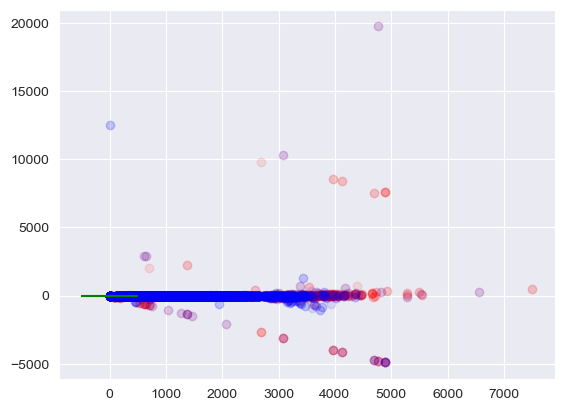

In [44]:
train = plt.scatter(rf_pred_train,y_train-rf_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(rf_pred_test,y_test-rf_pred_test, color="blue", label="test",alpha=0.1)
plt.hlines(xmin=-500,xmax =500,y=0,color="green")
plt.show()

In [45]:
resid = y_test - rf_pred_test

In [47]:
mse = mean_squared_error(y_test, rf_pred_test)
rmse = mse ** 0.5
r2 = r2_score(y_test, rf_pred_test)
mae = mean_absolute_error(y_test, rf_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2)

mse:  65291.9892909828
rmse:  255.5229721394591
mae:  10.1252467271567
r2_score:  0.8640346064261899


## what we learn here:

### MSE: In this case, the MSE is 65291.989, which suggests that the model is doing a good job at minimizing the errors.

### RMSE: In this case, the RMSE is 255.522, which indicates that the model's predictions are off by an average of 255.522 units.

### MAE: In this case, the MAE is 10.125, which indicates that the model's predictions are off by an average of 10.125 units.

### R^2: In this case, the R2 score is 0.864, which suggests that the model explains 86.4% of the variance in the dependent variable.

# new Features

## 1 Features

In [2]:
expidiaDf = pd.read_csv("expidiaCDFF.csv")
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           53054 non-null  object 
 1   price                          54384 non-null  int64  
 2   Breakfast include              54384 non-null  int64  
 3   full refund                    54384 non-null  int64  
 4   reserve now pay later          54384 non-null  int64  
 5   rate out of 10                 54384 non-null  float64
 6   properties left at this price  54384 non-null  int64  
 7   number of reviews              54384 non-null  int64  
 8   check_in                       54384 non-null  object 
 9   check_out                      54384 non-null  object 
 10  TTT                            54384 non-null  int64  
 11  LOS                            54384 non-null  int64  
 12  time_stamp                     54384 non-null 

## price prediction for weekdays, weekends and for end of the month

In [3]:
expidiaDf['check_out'] = pd.to_datetime(expidiaDf['check_out'])
expidiaDf['check_in'] = pd.to_datetime(expidiaDf['check_in'])
expidiaDf['duration'] = (expidiaDf['check_out'] - expidiaDf['check_in']).dt.days + 1

expidiaDf['weekend'] = ((pd.to_datetime(expidiaDf['check_in']).dt.dayofweek >= 5) |
                 (pd.to_datetime(expidiaDf['check_out']).dt.dayofweek >= 5)).astype(int)

expidiaDf['weekdays_or_weekend'] = ((expidiaDf['duration'] == expidiaDf['weekend']) | (expidiaDf['weekend'] > 0)).astype(int)
expidiaDf = expidiaDf.drop(columns=['duration', 'weekend'])
expidiaDf.describe().T

count         mean         std  min    25%  \
price                          54384.0  1003.386088  699.742837  0.0  500.0   
Breakfast include              54384.0     0.091773    0.288708  0.0    0.0   
full refund                    54384.0     0.479902    0.499601  0.0    0.0   
reserve now pay later          54384.0     0.434907    0.495749  0.0    0.0   
rate out of 10                 54384.0     7.963725    1.966660  0.0    8.0   
properties left at this price  54384.0     0.407454    0.491365  0.0    0.0   
number of reviews              54384.0  1027.186323  730.048472  0.0  760.0   
TTT                            54384.0    24.784587   13.070881  0.0   15.0   
LOS                            54384.0     3.968667    1.404052  2.0    3.0   
time_stamp                     54384.0     1.771348    0.828306  1.0    1.0   
pricefiltered                  54384.0   931.111191  574.449094  0.0  465.0   
weekdays_or_weekend            54384.0     0.552460    0.497245  0.0    0.0   

                                  50%     75%      max  
price                           897.5  1373.0  24492.0  
Breakfast include                 0.0     0.0      1.0  
full refund                       0.0     1.0      1.0  
reserve now pay later             0.0     1.0      1.0  
rate out of 10                    8.4     8.8     10.0  
properties left at this price     0.0     1.0      1.0  
number of reviews              1005.0  1163.0   6102.0  
TTT                              24.0    35.0     49.0  
LOS                               4.0     5.0      6.0  
time_stamp                        2.0     3.0      3.0  
pricefiltered                   862.0  1326.0   2672.0  
weekdays_or_weekend               1.0     1.0      1.0

### now lets see if we have any price changes in the same hotel at weekends

[Text(0, 0, '2023-03-05'),
 Text(1, 0, '2023-03-06'),
 Text(2, 0, '2023-03-07'),
 Text(3, 0, '2023-03-08'),
 Text(4, 0, '2023-03-09'),
 Text(5, 0, '2023-03-10'),
 Text(6, 0, '2023-03-11'),
 Text(7, 0, '2023-03-12'),
 Text(8, 0, '2023-03-13'),
 Text(9, 0, '2023-03-14'),
 Text(10, 0, '2023-03-15'),
 Text(11, 0, '2023-03-16'),
 Text(12, 0, '2023-03-17'),
 Text(13, 0, '2023-03-18'),
 Text(14, 0, '2023-03-19'),
 Text(15, 0, '2023-03-20'),
 Text(16, 0, '2023-03-21'),
 Text(17, 0, '2023-03-22'),
 Text(18, 0, '2023-03-23'),
 Text(19, 0, '2023-03-24'),
 Text(20, 0, '2023-03-25'),
 Text(21, 0, '2023-03-26'),
 Text(22, 0, '2023-03-27'),
 Text(23, 0, '2023-03-28'),
 Text(24, 0, '2023-03-29'),
 Text(25, 0, '2023-03-30'),
 Text(26, 0, '2023-03-31'),
 Text(27, 0, '2023-04-01'),
 Text(28, 0, '2023-04-02'),
 Text(29, 0, '2023-04-03'),
 Text(30, 0, '2023-04-04'),
 Text(31, 0, '2023-04-05'),
 Text(32, 0, '2023-04-06'),
 Text(33, 0, '2023-04-07'),
 Text(34, 0, '2023-04-08'),
 Text(35, 0, '2023-04-09'),
 T

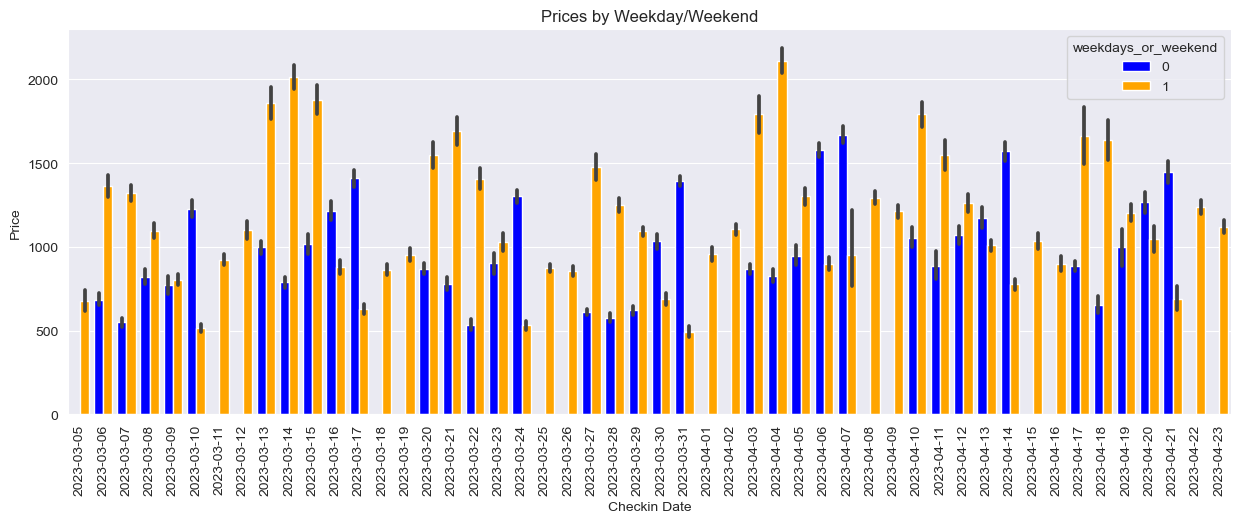

In [4]:
expidiaDf['check_in1'] = expidiaDf['check_in'].dt.date
expidiaDf['check_out1'] = expidiaDf['check_out'].dt.date

plt.figure(figsize=(15,5))
ax = sns.barplot(x='check_in1', y='price', hue='weekdays_or_weekend', data=expidiaDf, palette=['blue', 'orange'], saturation=1)
plt.title('Prices by Weekday/Weekend')
plt.xlabel('Checkin Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ylabel('Price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### now lets check for the end of the month

In [5]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           53054 non-null  object        
 1   price                          54384 non-null  int64         
 2   Breakfast include              54384 non-null  int64         
 3   full refund                    54384 non-null  int64         
 4   reserve now pay later          54384 non-null  int64         
 5   rate out of 10                 54384 non-null  float64       
 6   properties left at this price  54384 non-null  int64         
 7   number of reviews              54384 non-null  int64         
 8   check_in                       54384 non-null  datetime64[ns]
 9   check_out                      54384 non-null  datetime64[ns]
 10  TTT                            54384 non-null  int64         
 11  LOS            

In [6]:
expidiaDf["check_in_end_of_month"] = expidiaDf['check_in'].dt.is_month_end.astype(int)
expidiaDf["check_out_end_of_month"] = expidiaDf['check_out'].dt.is_month_end.astype(int)

expidiaDf['end_of_month'] = (expidiaDf["check_in_end_of_month"] | expidiaDf['check_out_end_of_month']).astype(int)

expidiaDf = expidiaDf.drop(["check_in_end_of_month","check_out_end_of_month"],axis=1)
mean_price_weekdays = expidiaDf.loc[expidiaDf['weekdays_or_weekend'] == 0, 'price'].mean()
mean_price_weekends = expidiaDf.loc[expidiaDf['weekdays_or_weekend'] == 1, 'price'].mean()
mean_price_end_of_month =  expidiaDf.loc[expidiaDf['end_of_month'] == 1, 'price'].mean()

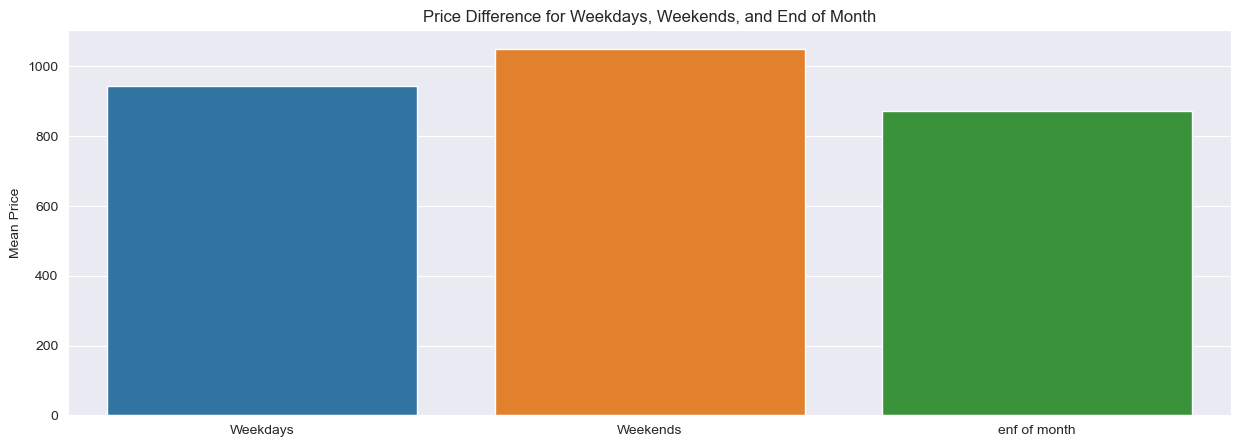

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=['Weekdays', 'Weekends', 'enf of month',],
            y=[mean_price_weekdays, mean_price_weekends, mean_price_end_of_month],
            ax=ax)
plt.ylabel('Mean Price')
plt.title('Price Difference for Weekdays, Weekends, and End of Month')
plt.show()

In [8]:
expidiaDf["price_per_night"] = expidiaDf["price"]/expidiaDf["LOS"]
mean_price_weekdays_per_day = expidiaDf.loc[expidiaDf['weekdays_or_weekend'] == 0, 'price_per_night'].mean()
mean_price_weekends_per_day = expidiaDf.loc[expidiaDf['weekdays_or_weekend'] == 1, 'price_per_night'].mean()
mean_price_end_of_month_per_day =  expidiaDf.loc[expidiaDf['end_of_month'] == 1, 'price_per_night'].mean()

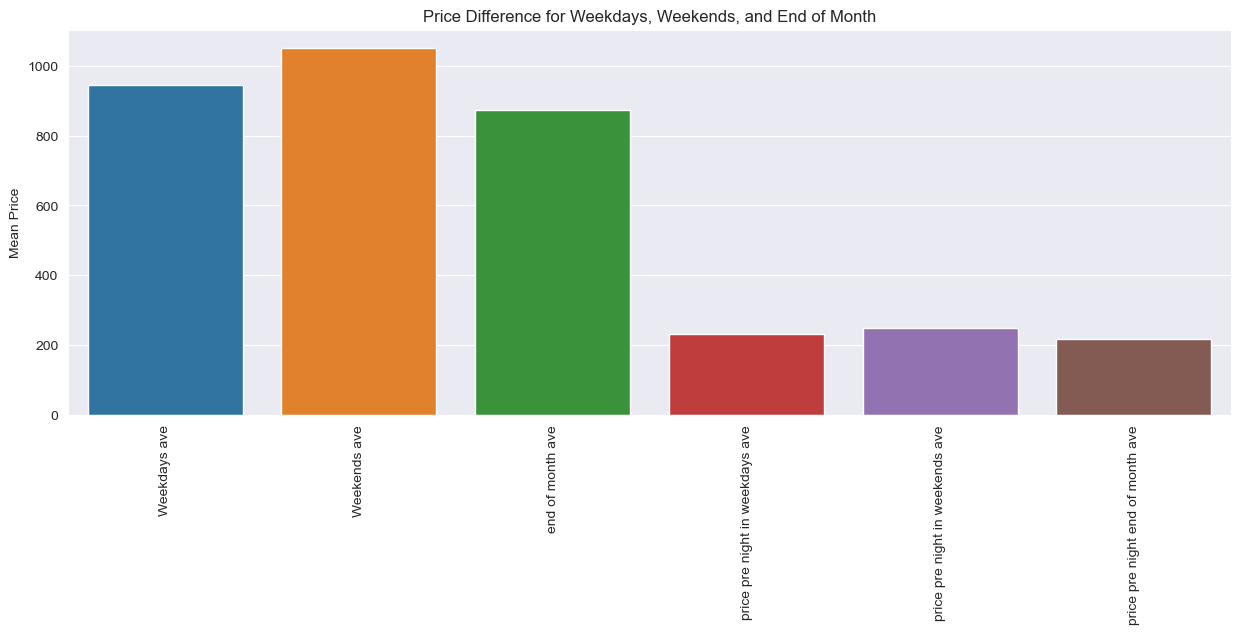

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=['Weekdays ave', 'Weekends ave', 'end of month ave','price pre night in weekdays ave','price pre night in weekends ave','price pre night end of month ave'],
            y=[mean_price_weekdays, mean_price_weekends, mean_price_end_of_month,mean_price_weekdays_per_day,mean_price_weekends_per_day,mean_price_end_of_month_per_day],
            ax=ax)
plt.ylabel('Mean Price')
plt.title('Price Difference for Weekdays, Weekends, and End of Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [10]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           53054 non-null  object        
 1   price                          54384 non-null  int64         
 2   Breakfast include              54384 non-null  int64         
 3   full refund                    54384 non-null  int64         
 4   reserve now pay later          54384 non-null  int64         
 5   rate out of 10                 54384 non-null  float64       
 6   properties left at this price  54384 non-null  int64         
 7   number of reviews              54384 non-null  int64         
 8   check_in                       54384 non-null  datetime64[ns]
 9   check_out                      54384 non-null  datetime64[ns]
 10  TTT                            54384 non-null  int64         
 11  LOS            

In [11]:
expidiaDf.drop(['check_in1','check_out1','price_per_night'], axis = 1, inplace=True)

<AxesSubplot: >

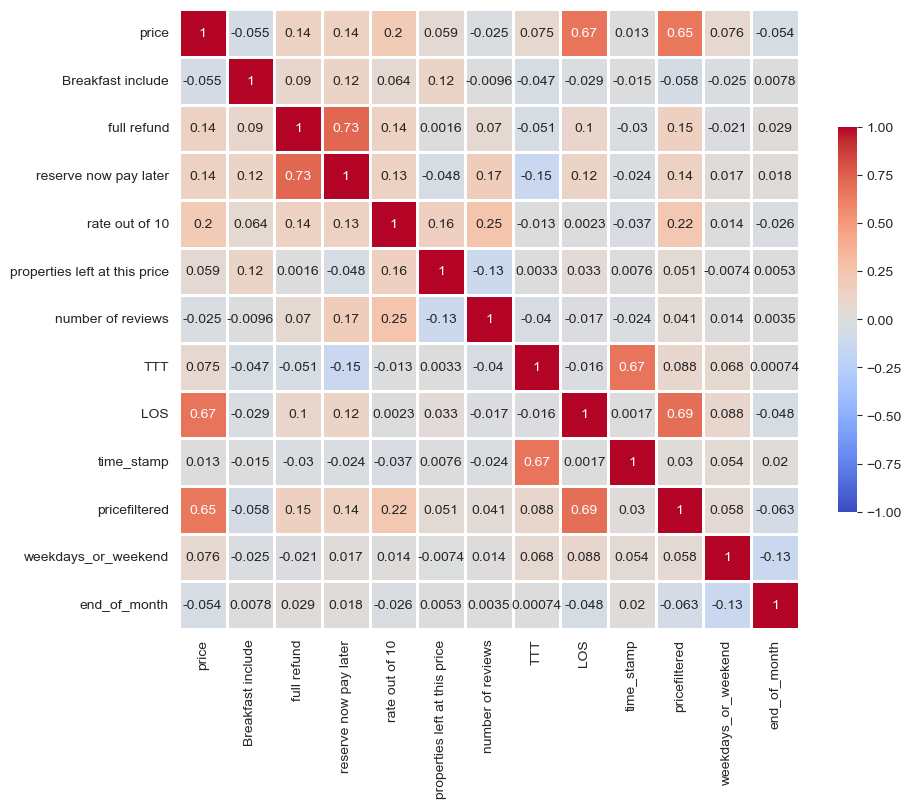

In [12]:
corr = expidiaDf.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm',vmin=-1, vmax=1, center=0,
            square=True, linewidths=-1, cbar_kws={"shrink": .5},annot=True, ax=ax)

### we have found this website that contains lists of all the names of the hotels in NY and how is there owner:

In [13]:
X = expidiaDf.drop(['name', 'check_out', 'check_in','pricefiltered','price'],axis=1)
y = expidiaDf["pricefiltered"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
arr_of_models = []
mlp = MLPRegressor(random_state = 1,max_iter = 3000)
arr_of_models.append(mlp)
lreg = LinearRegression()
arr_of_models.append(lreg)
random_forest = RandomForestRegressor(random_state = 1)
arr_of_models.append(random_forest)
reg = ensemble.GradientBoostingRegressor()
arr_of_models.append(reg)
descion_tree = DecisionTreeRegressor()
arr_of_models.append(descion_tree)

In [14]:
i = 1
r2_scores = []
for model in arr_of_models:
    model.fit(X_train, y_train)
    print(f'model number: {i}')
    print(f'score model: {model} ---> score is: {round(model.score(X_test, y_test),4)}')
    r2_scores.append(round(model.score(X_test, y_test),4))
    i = i + 1

model number: 1
score model: MLPRegressor(max_iter=3000, random_state=1) ---> score is: 0.5996
model number: 2
score model: LinearRegression() ---> score is: 0.5507
model number: 3
score model: RandomForestRegressor(random_state=1) ---> score is: 0.9164
model number: 4
score model: GradientBoostingRegressor() ---> score is: 0.6699
model number: 5
score model: DecisionTreeRegressor() ---> score is: 0.9077


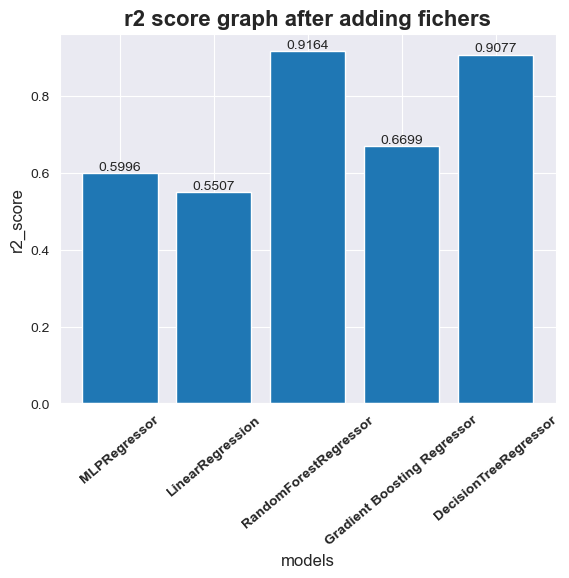

In [15]:
plt.bar(range(len(r2_scores)), r2_scores)
formatted_xticks = ['MLPRegressor', 'LinearRegression','RandomForestRegressor', 'Gradient Boosting Regressor', 'DecisionTreeRegressor']
plt.xticks(range(len(r2_scores)), formatted_xticks, rotation=40,fontweight='bold')
plt.title("r2 score graph after adding fichers", fontsize=16,fontweight='bold')
plt.xlabel("models", fontsize=12)
plt.ylabel("r2_score", fontsize=12)

# add count value on top of each bar
for i, v in enumerate(r2_scores):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom', fontsize=10)

plt.show()

In [16]:
y_rf = expidiaDf["pricefiltered"]
X_rf = expidiaDf.drop(["pricefiltered", 'name', 'check_in', 'check_out','price'],axis=1)
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf,test_size=0.75,train_size=0.25, random_state=42)

In [17]:
rf = RandomForestRegressor(n_estimators = 200,random_state = 42,oob_score = True)

In [18]:
rf.fit(x_rf_train, y_rf_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=42)

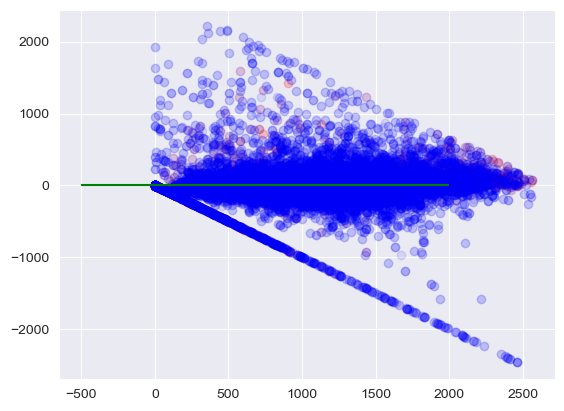

In [19]:
rf_pred_train = rf.predict(x_rf_train)
rf_pred_test = rf.predict(x_rf_test)

train = plt.scatter(rf_pred_train,y_rf_train-rf_pred_train, color="red", label="train",alpha=0.1)
test = plt.scatter(rf_pred_test,y_rf_test-rf_pred_test, color="blue", label="test",alpha=0.1)
plt.hlines(xmin=-500,xmax =2000,y=0,color="green")
plt.show()

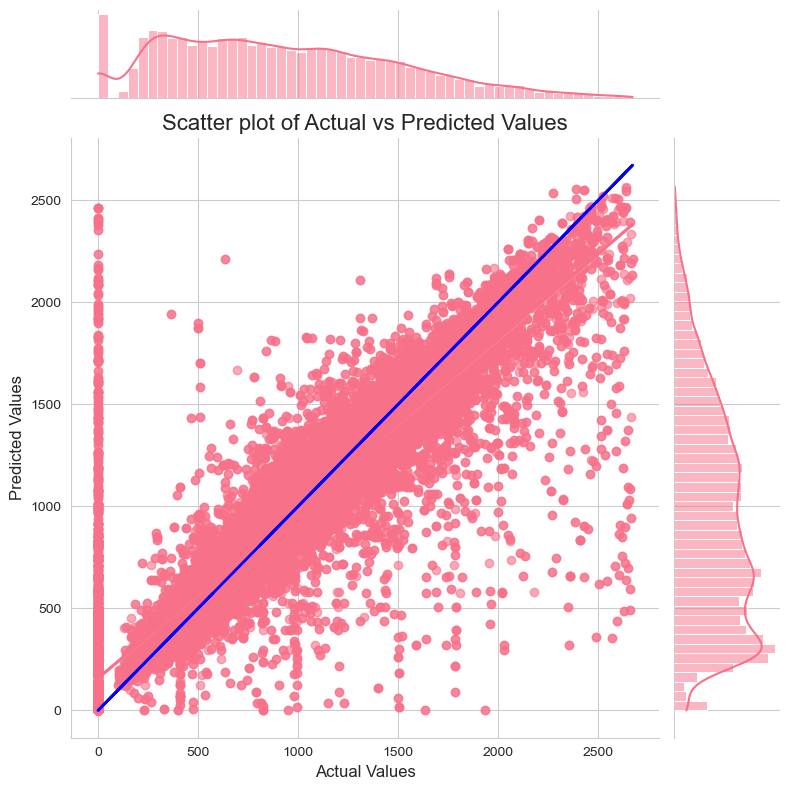

In [20]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_rf_test, y=rf_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_rf_test, y_rf_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
mse = mean_squared_error(y_rf_test, rf_pred_test)
rmse = mse ** 0.5
r2_random_forest = r2_score(y_rf_test, rf_pred_test)
mae = mean_absolute_error(y_rf_test, rf_pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_random_forest)

mse:  56285.5404626659
rmse:  237.24573855533401
mae:  113.62507989134544
r2_score:  0.830080245314318


## Bonus : xgboost

In [121]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           53054 non-null  object        
 1   price                          54384 non-null  int64         
 2   Breakfast include              54384 non-null  int64         
 3   full refund                    54384 non-null  int64         
 4   reserve now pay later          54384 non-null  int64         
 5   rate out of 10                 54384 non-null  float64       
 6   properties left at this price  54384 non-null  int64         
 7   number of reviews              54384 non-null  int64         
 8   check_in                       54384 non-null  datetime64[ns]
 9   check_out                      54384 non-null  datetime64[ns]
 10  TTT                            54384 non-null  int64         
 11  LOS            

In [178]:
X = expidiaDf.drop(["pricefiltered", 'name', 'check_in', 'check_out','price'],axis=1)
y = expidiaDf["pricefiltered"]

In [179]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [180]:
xgb = XGBRegressor(learning_rate=0.5, max_depth=4, min_child_weight=11, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)

In [181]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=11, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=1, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [182]:
xgb.score(x_test, y_test)

0.77632224511711

In [183]:
pred_train = xgb.predict(x_train)
pred_test = xgb.predict(x_test)

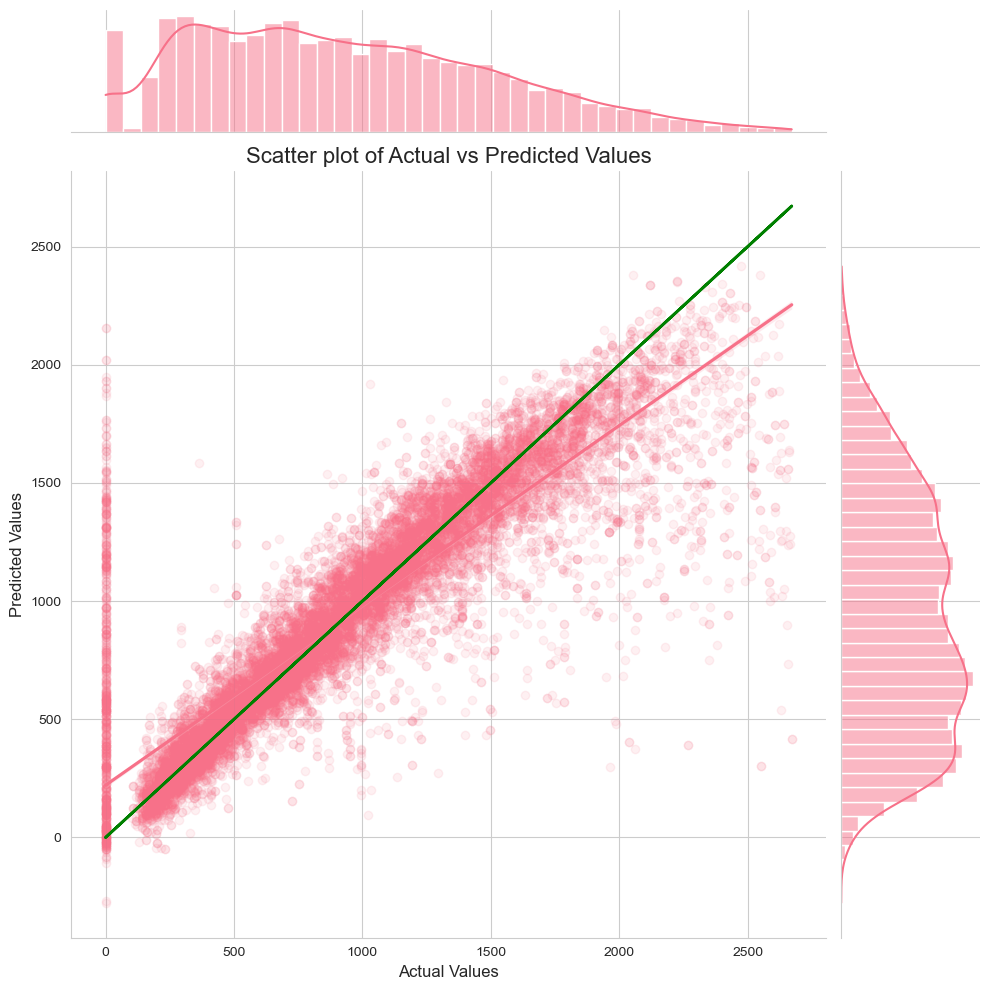

In [184]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=pred_test, kind="reg", height=10, joint_kws={'scatter_kws':dict(alpha=0.1)})
plt.plot(y_test, y_test, linewidth=2, color="green")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

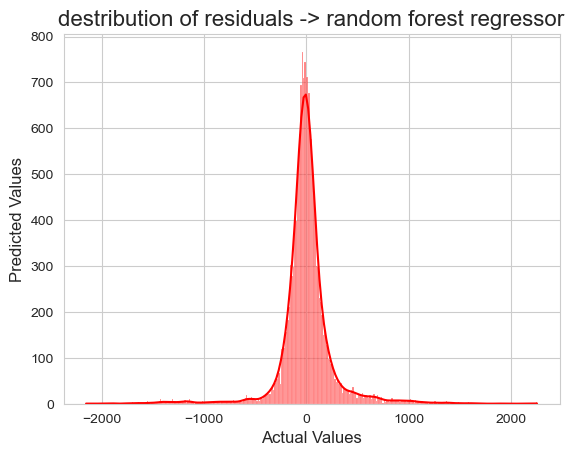

In [185]:
resid = y_test - pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals -> random forest regressor", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

In [186]:
mse = mean_squared_error(y_test, pred_test)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2)

mse:  74303.7959906907
rmse:  272.5872263894453
mae:  150.99874620044253
r2_score:  0.77632224511711


## what we learn from that:
### we can assume that the XGBoost model has some predictive power and can explain a reasonable amount of the variance in the target variable.
### The low values of RMSE and MAE indicate that the model is making relatively small errors on average when predicting the target variable. The high R2 score indicates that the XGBoost model is explaining a significant proportion of the variability in the target variable compared to a baseline model that always predicts the mean.

# Conclusion

## in this phase, we worked with Expedia and Booking data that we extracted from their website. In Booking website, we were able to get more data based on the way the website looks; because of that, we can assume that we could get better projections on Booking prices and, for that, some better results these models